In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import missingno as msno

# 오류가 난다면 적절히 수정할 것
data_path = '../../../data/'

## 마켓 데이터들 각각 데이터프레임에 로드하기

In [3]:
train = pd.read_csv(data_path + 'train.csv')
# 컬럼 이름 변경
train = train.rename(columns={'ID': 'datetime'})
train['datetime'] = pd.to_datetime(train['datetime'])
train.head(), train.tail()

(             datetime  target
 0 2023-01-01 00:00:00       2
 1 2023-01-01 01:00:00       1
 2 2023-01-01 02:00:00       1
 3 2023-01-01 03:00:00       1
 4 2023-01-01 04:00:00       2,
                 datetime  target
 8755 2023-12-31 19:00:00       1
 8756 2023-12-31 20:00:00       1
 8757 2023-12-31 21:00:00       0
 8758 2023-12-31 22:00:00       2
 8759 2023-12-31 23:00:00       2)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  8760 non-null   datetime64[ns]
 1   target    8760 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 137.0 KB


In [5]:
test = pd.read_csv(data_path + 'test.csv')
# 컬럼 이름 변경
test = test.rename(columns={'ID': 'datetime'})
test['datetime'] = pd.to_datetime(test['datetime'])
test.head(), test.tail()

(             datetime
 0 2024-01-01 00:00:00
 1 2024-01-01 01:00:00
 2 2024-01-01 02:00:00
 3 2024-01-01 03:00:00
 4 2024-01-01 04:00:00,
                 datetime
 2787 2024-04-26 03:00:00
 2788 2024-04-26 04:00:00
 2789 2024-04-26 05:00:00
 2790 2024-04-26 06:00:00
 2791 2024-04-26 07:00:00)

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2792 entries, 0 to 2791
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  2792 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 21.9 KB


### inference 할 범위는 2024 01 01 부터 2024 04 26 07시 까지,
### 필요한 데이터의 범위는 2023 01 01 부터 2024 04 26 07시

In [7]:
price = pd.read_csv(data_path + 'HOURLY_MARKET-DATA_PRICE-OHLCV_ALL_EXCHANGE_SPOT_BTC_USD.csv')
price['datetime'] = pd.to_datetime(price['datetime'])
price.head(), price.tail()

(             datetime         close       volume
 0 2023-01-01 00:00:00  16536.747967  5516.420322
 1 2023-01-01 01:00:00  16557.136536  4513.341881
 2 2023-01-01 02:00:00  16548.149805  4310.904314
 3 2023-01-01 03:00:00  16533.632875  4893.417864
 4 2023-01-01 04:00:00  16524.712159  5209.002297,
                 datetime         close       volume
 8755 2023-12-31 19:00:00  42597.709522  1002.251559
 8756 2023-12-31 20:00:00  42535.570787  1070.042124
 8757 2023-12-31 21:00:00  42497.523419  1026.473547
 8758 2023-12-31 22:00:00  42257.026218  1715.192245
 8759 2023-12-31 23:00:00  42285.799905  1549.917518)

In [8]:
volume = pd.read_csv(data_path + 'HOURLY_MARKET-DATA_TAKER-BUY-SELL-STATS_ALL_EXCHANGE.csv')
volume['datetime'] = pd.to_datetime(volume['datetime'])
volume

datetime  taker_buy_volume  taker_sell_volume  \
0     2024-04-25 02:00:00      3.201619e+08       2.553196e+08   
1     2024-04-25 01:00:00      2.691146e+08       3.427954e+08   
2     2024-04-25 00:00:00      3.176934e+08       2.581789e+08   
3     2024-04-24 23:00:00      3.404798e+08       3.169102e+08   
4     2024-04-24 22:00:00      2.104070e+08       2.847911e+08   
...                   ...               ...                ...   
75223 2015-09-25 17:00:00      1.650000e+04       3.835000e+03   
75224 2015-09-25 16:00:00      2.250000e+04       6.700000e+03   
75225 2015-09-25 15:00:00      7.400000e+03       1.950000e+04   
75226 2015-09-25 14:00:00      1.042000e+04       7.014000e+03   
75227 2015-09-25 13:00:00      1.250000e+02       2.250000e+04   

       taker_buy_ratio  taker_sell_ratio  taker_buy_sell_ratio  
0             0.556337          0.443663              1.253965  
1             0.439794          0.560206              0.785059  
2             0.551673          0.448327              1.230517  
3             0.517927          0.482073              1.074373  
4             0.424895          0.575105              0.738812  
...                ...               ...                   ...  
75223         0.811409          0.188591              4.302477  
75224         0.770548          0.229452              3.358209  
75225         0.275093          0.724907              0.379487  
75226         0.597683          0.402317              1.485600  
75227         0.005525          0.994475              0.005556  

[75228 rows x 6 columns]

In [9]:
liquid = pd.read_csv(data_path + 'HOURLY_MARKET-DATA_LIQUIDATIONS_ALL_EXCHANGE_ALL_SYMBOL.csv')
liquid['datetime'] = pd.to_datetime(liquid['datetime'])
liquid.head()

datetime  long_liquidations  short_liquidations  \
0 2024-04-26 11:00:00           0.008974            0.052000   
1 2024-04-26 10:00:00           9.029485            0.015000   
2 2024-04-26 09:00:00           0.646000            1.530479   
3 2024-04-26 08:00:00           0.483000            0.261000   
4 2024-04-26 07:00:00           2.360383            3.930057   

   long_liquidations_usd  short_liquidations_usd  
0              572.75910              3347.15338  
1           577355.85989               970.12692  
2            41461.23896             98975.62471  
3            30903.30038             16855.20633  
4           151151.38884            253858.89276

In [10]:
interest = pd.read_csv(data_path + 'HOURLY_MARKET-DATA_OPEN-INTEREST_ALL_EXCHANGE_ALL_SYMBOL.csv')
interest['datetime'] = pd.to_datetime(interest['datetime'])
interest.head()

datetime  open_interest
0 2024-04-26 03:00:00   1.486836e+10
1 2024-04-26 02:00:00   1.489030e+10
2 2024-04-26 01:00:00   1.481352e+10
3 2024-04-26 00:00:00   1.475586e+10
4 2024-04-25 23:00:00   1.477917e+10

In [11]:
rate = pd.read_csv(data_path + 'HOURLY_MARKET-DATA_FUNDING-RATES_ALL_EXCHANGE.csv')
rate['datetime'] = pd.to_datetime(rate['datetime'])
rate.head()

datetime  funding_rates
0 2024-04-25 00:00:00       0.009411
1 2024-04-24 23:00:00       0.009148
2 2024-04-24 22:00:00       0.009161
3 2024-04-24 21:00:00       0.008735
4 2024-04-24 20:00:00       0.007682

In [12]:
premium = pd.read_csv(data_path + 'HOURLY_MARKET-DATA_COINBASE-PREMIUM-INDEX.csv')
premium['datetime'] = pd.to_datetime(premium['datetime'])
premium.head()

datetime  coinbase_premium_gap  coinbase_premium_index
0 2024-04-26 06:00:00                 -2.05               -0.003184
1 2024-04-26 05:00:00                  1.85                0.002866
2 2024-04-26 04:00:00                -11.73               -0.018268
3 2024-04-26 03:00:00                 -1.53               -0.002376
4 2024-04-26 02:00:00                  2.70                0.004186

### Open interest, Funding rates, Premium은 4월 26일 7시까지의 데이터가 불충분 -> 결측치 처리 필요

## 마켓 데이터들 train에 모으기

In [13]:
market_data_list = [liquid, interest, rate, premium, price, volume]
for df in market_data_list:
    train = train.merge(df, on='datetime', how='left')

for df in market_data_list:
    test = test.merge(df, on='datetime', how='left')

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   datetime                8760 non-null   datetime64[ns]
 1   target                  8760 non-null   int64         
 2   long_liquidations       8760 non-null   float64       
 3   short_liquidations      8760 non-null   float64       
 4   long_liquidations_usd   8760 non-null   float64       
 5   short_liquidations_usd  8760 non-null   float64       
 6   open_interest           8760 non-null   float64       
 7   funding_rates           8760 non-null   float64       
 8   coinbase_premium_gap    8755 non-null   float64       
 9   coinbase_premium_index  8755 non-null   float64       
 10  close                   8760 non-null   float64       
 11  volume                  8760 non-null   float64       
 12  taker_buy_volume        8760 non-null   float64 

### premium 데이터들도 아예 행이 비어있는 결측치 존재 확인

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2792 entries, 0 to 2791
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   datetime                2792 non-null   datetime64[ns]
 1   long_liquidations       2792 non-null   float64       
 2   short_liquidations      2792 non-null   float64       
 3   long_liquidations_usd   2792 non-null   float64       
 4   short_liquidations_usd  2792 non-null   float64       
 5   open_interest           2788 non-null   float64       
 6   funding_rates           2760 non-null   float64       
 7   coinbase_premium_gap    2791 non-null   float64       
 8   coinbase_premium_index  2791 non-null   float64       
 9   close                   0 non-null      float64       
 10  volume                  0 non-null      float64       
 11  taker_buy_volume        2761 non-null   float64       
 12  taker_sell_volume       2761 non-null   float64 

## Network 데이터들 한 데이터프레임에 모으기

In [16]:
# HOURLY_NETWORK 로 시작하는 .csv 파일 이름을 file_names 에 할당
file_names = [f for f in os.listdir(data_path) if f.startswith('HOURLY_NETWORK')]
file_names

['HOURLY_NETWORK-DATA_VELOCITY.csv',
 'HOURLY_NETWORK-DATA_UTXO-COUNT.csv',
 'HOURLY_NETWORK-DATA_DIFFICULTY.csv',
 'HOURLY_NETWORK-DATA_FEES.csv',
 'HOURLY_NETWORK-DATA_TOKENS-TRANSFERRED.csv',
 'HOURLY_NETWORK-DATA_TRANSACTIONS-COUNT.csv',
 'HOURLY_NETWORK-DATA_FEES-TRANSACTION.csv',
 'HOURLY_NETWORK-DATA_BLOCK-COUNT.csv',
 'HOURLY_NETWORK-DATA_SUPPLY.csv',
 'HOURLY_NETWORK-DATA_HASHRATE.csv',
 'HOURLY_NETWORK-DATA_BLOCKREWARD.csv',
 'HOURLY_NETWORK-DATA_ADDRESSES-COUNT.csv',
 'HOURLY_NETWORK-DATA_BLOCK-INTERVAL.csv',
 'HOURLY_NETWORK-DATA_BLOCK-BYTES.csv']

In [17]:
# 네트워크 데이터 중 끝나는 시각이 04 26 07시 인 데이터를 merge할 기준 데이터로 선정, 이거 찍어봤을때 4.26 07시가 아니면 다른 데이터로 찾아 바꿀것
network = pd.read_csv(os.path.join(data_path, file_names[0]))
network.head()

datetime  velocity_supply_total
0  2024-04-26 07:00:00              15.710484
1  2024-04-26 06:00:00              15.710891
2  2024-04-26 05:00:00              15.709207
3  2024-04-26 04:00:00              15.709585
4  2024-04-26 03:00:00              15.708903

In [18]:

for file_name in file_names:
    temp = pd.read_csv(os.path.join(data_path, file_name))
    network = network.merge(temp, on='datetime', how='left')
network.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115021 entries, 0 to 115020
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   datetime                     115021 non-null  object 
 1   velocity_supply_total_x      115021 non-null  float64
 2   velocity_supply_total_y      115021 non-null  float64
 3   utxo_count                   112438 non-null  float64
 4   difficulty                   114764 non-null  float64
 5   fees_block_mean              114764 non-null  float64
 6   fees_block_mean_usd          114764 non-null  float64
 7   fees_total                   115021 non-null  float64
 8   fees_total_usd               115021 non-null  float64
 9   fees_reward_percent          114764 non-null  float64
 10  tokens_transferred_total     115021 non-null  float64
 11  tokens_transferred_mean      114760 non-null  float64
 12  tokens_transferred_median    115021 non-null  float64
 13 

In [19]:
network.head()

datetime  velocity_supply_total_x  velocity_supply_total_y  \
0  2024-04-26 07:00:00                15.710484                15.710484   
1  2024-04-26 06:00:00                15.710891                15.710891   
2  2024-04-26 05:00:00                15.709207                15.709207   
3  2024-04-26 04:00:00                15.709585                15.709585   
4  2024-04-26 03:00:00                15.708903                15.708903   

    utxo_count    difficulty  fees_block_mean  fees_block_mean_usd  \
0          NaN  8.810419e+13         0.845135         54431.281324   
1  179852452.0  8.810419e+13         0.485483         31287.539460   
2  179851249.0  8.810419e+13         0.625348         40213.804000   
3  179833897.0  8.810419e+13         0.674233         43369.993511   
4  179820708.0  8.810419e+13         0.779972         50242.893436   

   fees_total  fees_total_usd  fees_reward_percent  ...  supply_total  \
0    2.535404   163293.843971             0.212873  ...           NaN   
1    1.941932   125150.157841             0.134465  ...           NaN   
2    3.752089   241282.824002             0.166744  ...           NaN   
3    4.045398   260219.961065             0.177466  ...           NaN   
4    2.339916   150728.680308             0.199738  ...           NaN   

   supply_new      hashrate  blockreward  blockreward_usd  \
0         NaN  3.153372e+11    11.910404     7.670859e+05   
1         NaN  4.204496e+11    14.441932     9.307435e+05   
2         NaN  6.306744e+11    22.502089     1.447081e+06   
3         NaN  6.306744e+11    22.795398     1.466257e+06   
4         NaN  3.153372e+11    11.714916     7.545328e+05   

   addresses_count_active  addresses_count_sender  addresses_count_receiver  \
0                   31851                   18649                     16054   
1                   36270                   26186                     12668   
2                   51858                   34083                     22094   
3                   56580                   31320                     29096   
4                   29250                   18154                     13601   

   block_interval  block_bytes  
0     1413.666667          NaN  
1      501.000000          NaN  
2      658.000000          NaN  
3      697.333333          NaN  
4      895.000000          NaN  

[5 rows x 30 columns]

In [20]:
# train + test = 11552
network = network.iloc[:11552, :]
network['datetime'] = pd.to_datetime(network['datetime'])
network

datetime  velocity_supply_total_x  velocity_supply_total_y  \
0     2024-04-26 07:00:00                15.710484                15.710484   
1     2024-04-26 06:00:00                15.710891                15.710891   
2     2024-04-26 05:00:00                15.709207                15.709207   
3     2024-04-26 04:00:00                15.709585                15.709585   
4     2024-04-26 03:00:00                15.708903                15.708903   
...                   ...                      ...                      ...   
11547 2023-01-01 04:00:00                65.969825                65.969825   
11548 2023-01-01 03:00:00                65.975092                65.975092   
11549 2023-01-01 02:00:00                65.975570                65.975570   
11550 2023-01-01 01:00:00                65.977755                65.977755   
11551 2023-01-01 00:00:00                65.978971                65.978971   

        utxo_count    difficulty  fees_block_mean  fees_block_mean_usd  \
0              NaN  8.810419e+13         0.845135         54431.281324   
1      179852452.0  8.810419e+13         0.485483         31287.539460   
2      179851249.0  8.810419e+13         0.625348         40213.804000   
3      179833897.0  8.810419e+13         0.674233         43369.993511   
4      179820708.0  8.810419e+13         0.779972         50242.893436   
...            ...           ...              ...                  ...   
11547   83339168.0  3.536407e+13         0.049267           814.168153   
11548   83326258.0  3.536407e+13         0.043966           726.437226   
11549   83314090.0  3.536407e+13         0.039122           647.076754   
11550   83314883.0  3.536407e+13         0.064062          1059.273848   
11551   83308092.0  3.536407e+13         0.046753           772.625301   

       fees_total  fees_total_usd  fees_reward_percent  ...  supply_total  \
0        2.535404   163293.843971             0.212873  ...           NaN   
1        1.941932   125150.157841             0.134465  ...           NaN   
2        3.752089   241282.824002             0.166744  ...           NaN   
3        4.045398   260219.961065             0.177466  ...           NaN   
4        2.339916   150728.680308             0.199738  ...           NaN   
...           ...             ...                  ...  ...           ...   
11547    0.344866     5699.177070             0.007821  ...  1.924886e+07   
11548    0.219829     3632.186132             0.006985  ...  1.924882e+07   
11549    0.312978     5176.614029             0.006221  ...  1.924879e+07   
11550    0.256248     4237.095391             0.010146  ...  1.924874e+07   
11551    0.561037     9271.503609             0.007425  ...  1.924871e+07   

       supply_new      hashrate  blockreward  blockreward_usd  \
0             NaN  3.153372e+11    11.910404     7.670859e+05   
1             NaN  4.204496e+11    14.441932     9.307435e+05   
2             NaN  6.306744e+11    22.502089     1.447081e+06   
3             NaN  6.306744e+11    22.795398     1.466257e+06   
4             NaN  3.153372e+11    11.714916     7.545328e+05   
...           ...           ...          ...              ...   
11547       43.75  2.953368e+11    44.094866     7.286038e+05   
11548       31.25  2.109549e+11    31.469829     5.199754e+05   
11549       50.00  3.375278e+11    50.312978     8.321735e+05   
11550       25.00  1.687639e+11    25.256248     4.176322e+05   
11551       75.00  5.062917e+11    75.561037     1.248565e+06   

       addresses_count_active  addresses_count_sender  \
0                       31851                   18649   
1                       36270                   26186   
2                       51858                   34083   
3                       56580                   31320   
4                       29250                   18154   
...                       ...                     ...   
11547                   45176                   17320   
11548            

### 대충 네트워크 데이터를 한 테이블에 모으고 2023 01 01 부터 2024 04 26 07시로 정돈

In [21]:
# 결측치 개수 계산
missing_counts = network.isnull().sum().sort_values(ascending=False)

# 결측치가 있는 컬럼만 선택 (개수가 0보다 큰 경우)
missing_columns = missing_counts[missing_counts > 0]

# 결과 출력
print("결측치 개수 (컬럼별):")
print(missing_columns)

결측치 개수 (컬럼별):
block_bytes                  54
transactions_count_mean      28
supply_new                   28
supply_total                 28
difficulty                   24
fees_block_mean              24
fees_reward_percent          24
block_interval               24
fees_transaction_mean        24
fees_transaction_mean_usd    24
fees_block_mean_usd          24
tokens_transferred_mean      24
block_count                   4
transactions_count_total      4
utxo_count                    1
dtype: int64


# price에 대한 단변량 분석과 다변량 분석

In [22]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  8760 non-null   datetime64[ns]
 1   close     8760 non-null   float64       
 2   volume    8760 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 205.4 KB


In [23]:
price.describe()

datetime         close         volume
count                 8760   8760.000000    8760.000000
mean   2023-07-02 11:30:00  28797.311293    5068.806648
min    2023-01-01 00:00:00  16519.005107     116.496744
25%    2023-04-02 05:45:00  25927.520671    1005.763158
50%    2023-07-02 11:30:00  27698.872221    2080.778155
75%    2023-10-01 17:15:00  30241.233602    6001.937086
max    2023-12-31 23:00:00  44537.263059  106106.465006
std                    NaN   5885.741786    7614.047475

### close와 volume의 통계량
close의 경우엔 mean과 50%가 비슷하고 std 경우도 너무 크지 않게 나온다,
밑의 plot을 놓고 봐도 점진적으로 증가한 그래프에 대한 통계량에 대한 기대와 일치한다고 보인다?

volume의 경우는 mean과 50%가 큰 차이를 보인다, 데이터가 중위값 보다 위쪽에 많이 몰려있거나 이상치가 위쪽에 많이 분포한다고 생각할 수 있다?
실제로 75%와 mean이 더 가깝게 나온다는 것을 확인할 수 있다
std의 경우도 mean과 50%에 비해서 크게 측정되었다, max값이 많이 큰 것도 그렇고 되게 불규칙하며 거래가 몰리는 날들이 있다고 예상해볼 수 있다

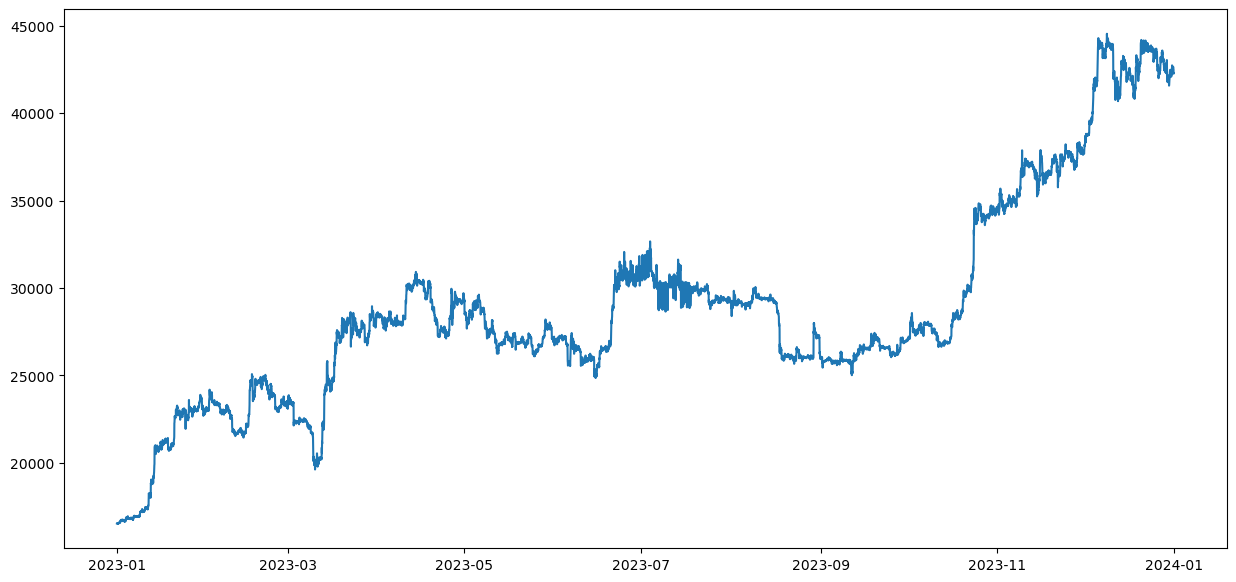

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.plot(price['datetime'], price['close'])
plt.show()

점차적으로 상승하는 그래프의 형태를 띄고 있다 부럽다


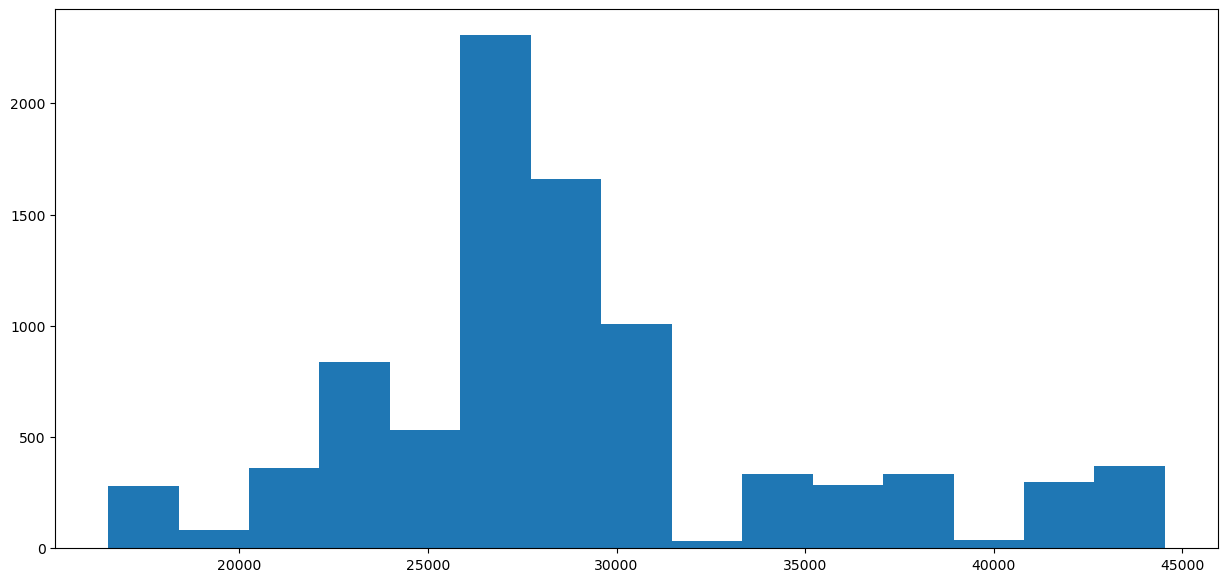

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.hist(price['close'], bins=15)
plt.show()

히스토그램의 의미는 별로 없는거 같다, 중위값인 27000 근처에 많이 몰려있는 것은 확인된다, 30000 초반에서 중반으로 확 뛰어서 중간 갭이 생겼다, 40000 근처도 마찬가지

### close, volume을 일별로 모아서 한번에 보기

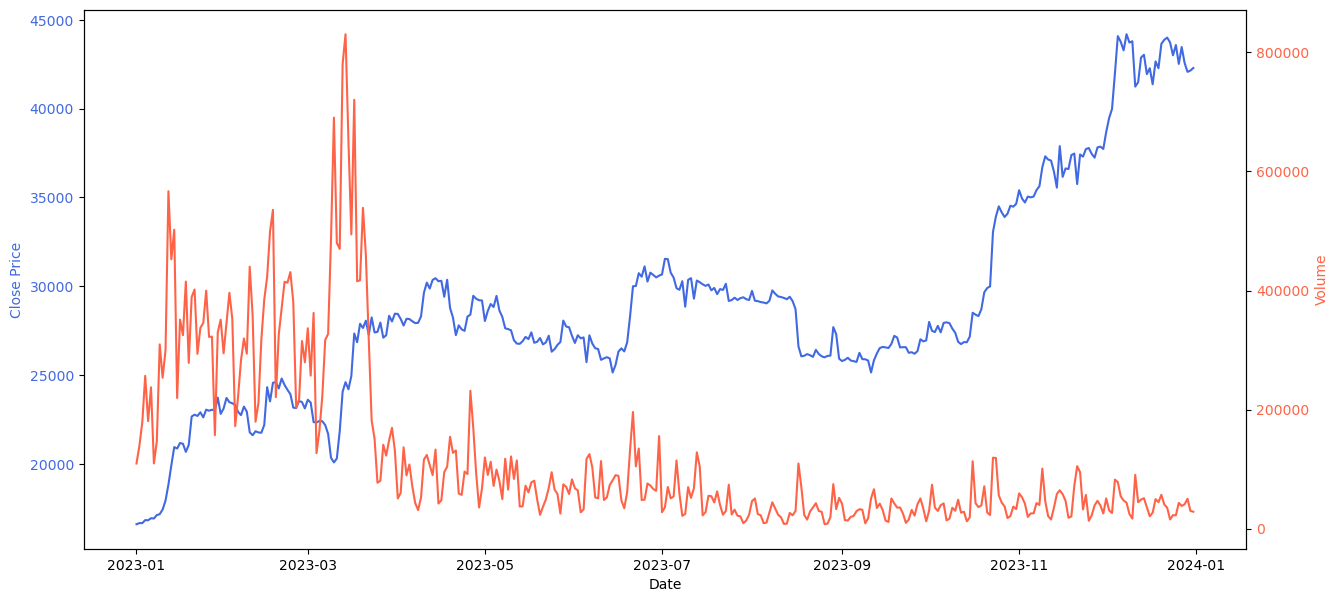

In [26]:
# datetime 컬럼을 인덱스로 설정
# 일별 데이터로 변환
daily_price = price.set_index('datetime').resample('D').agg({
    'close': 'last',  # 종가는 마지막 값 사용
    'volume': 'sum'   # 거래량은 합계 사용
})

# 인덱스 이름을 'date'로 변경
daily_price.index.name = 'date'

# 인덱스를 컬럼으로 변환 (선택사항)
daily_price.reset_index(inplace=True)


fig, ax1 = plt.subplots(1, 1, figsize=(15, 7))
# Close 가격 그래프 (왼쪽 y축)
ax1.plot(daily_price['date'], daily_price['close'], color='royalblue', label='close')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')

# Volume 그래프를 위한 두 번째 y축 생성
ax2 = ax1.twinx()
ax2.plot(daily_price['date'], daily_price['volume'], color='tomato', label='volume')
ax2.set_ylabel('Volume', color='tomato')
ax2.tick_params(axis='y', labelcolor='tomato')
plt.show()

## 그래프 분석

23년 3월 전까지 거래량이 꾸준히 많았다

3월에 거래량이 급등하면서 코인 가격도 같이 급등하는 모습을 보였다

이후로는 거래량의 변동이 그리 크지 않다

### 3월 급등 단기 주요 요인
금융 시장 불안과 금리 인상 속도 조절 기대

- 은행의 파산, 위기설 등으로 인해 비트코인을 대체 자산으로 인식

- 금리 인상을 앞으로 천천히 할것이라는 기대감

### 6월 급등, 8월 급락, 10월 급등과 그에 비해 낮은 거래량

- 6월 규제 환경 개선: 미국 SEC와 블랙록의 현물 비트코인 ETF 신청 소식이 시장에 긍정적인 영향
- 8월 규제 우려: 미국 SEC의 암호화폐 규제 강화 움직임이 투자자들의 불안감을 증폭
- 10월 ETF 승인 기대감: 비트코인 현물 ETF 승인에 대한 기대감이 높아짐

그에 반해 거래량은 3월의 거래량에 한참 못미치는데

- 장기 투자자의 증가
- 기관 투자자들의 OTC 거래(장외 거래->기록되지 않음) 증가
- 전반적인 시장 안정화 등 시장의 성숙화

### 크게는 장기 투자자의 증가와 기관 투자자들이 장외거래를 하여 기록되지 못함 두가지가 큰 요인인것 같다

## 이 정보를 어떻게 활용할 것인가

### 1. 주어진 학습 데이터의 기간을 크게 3월 전, 3월, 3월 이후의 세 기간으로 나눌 수 있겠다

### 2. 많은 거래가 기관의 장외 거래로 이루어져 마켓 데이터로 수집되지 않았다

우리의 데이터는 클래스의 분포가 불균형한 다중 분류 상황


# 마켓 데이터 분석

In [27]:
train

datetime  target  long_liquidations  short_liquidations  \
0    2023-01-01 00:00:00       2           0.012000              0.0000   
1    2023-01-01 01:00:00       1           0.000000              0.7120   
2    2023-01-01 02:00:00       1           0.000000              0.0000   
3    2023-01-01 03:00:00       1           0.593000              0.0000   
4    2023-01-01 04:00:00       2           0.361000              0.0000   
...                  ...     ...                ...                 ...   
8755 2023-12-31 19:00:00       1           0.163000              0.1040   
8756 2023-12-31 20:00:00       1          29.698896             43.8396   
8757 2023-12-31 21:00:00       0           0.325000              1.6790   
8758 2023-12-31 22:00:00       2          90.293123              7.7816   
8759 2023-12-31 23:00:00       2          14.387343              0.4620   

      long_liquidations_usd  short_liquidations_usd  open_interest  \
0              1.975161e+02            0.000000e+00   6.271344e+09   
1              0.000000e+00            1.183356e+04   6.288683e+09   
2              0.000000e+00            0.000000e+00   6.286796e+09   
3              9.754769e+03            0.000000e+00   6.284575e+09   
4              5.944437e+03            0.000000e+00   6.291582e+09   
...                     ...                     ...            ...   
8755           6.924677e+03            4.437410e+03   1.054230e+10   
8756           1.263031e+06            1.870481e+06   1.051484e+10   
8757           1.385218e+04            7.179552e+04   1.048598e+10   
8758           3.815777e+06            3.310213e+05   1.032844e+10   
8759           6.046119e+05            1.956475e+04   1.032241e+10   

      funding_rates  coinbase_premium_gap  coinbase_premium_index  \
0          0.005049                 -9.86               -0.059650   
1          0.005049                 -8.78               -0.053047   
2          0.005049                 -9.59               -0.057952   
3          0.005067                 -9.74               -0.058912   
4          0.006210                -10.14               -0.061373   
...             ...                   ...                     ...   
8755       0.036371                -27.10               -0.063587   
8756       0.037233                -24.73               -0.058109   
8757       0.037761                -28.48               -0.066979   
8758       0.038020                 -9.08               -0.021487   
8759       0.037049                  4.48                0.010595   

             close       volume  taker_buy_volume  taker_sell_volume  \
0     16536.747967  5516.420322      4.648309e+07       5.137537e+07   
1     16557.136536  4513.341881      3.975599e+07       2.401129e+07   
2     16548.149805  4310.904314      2.405402e+07       2.340995e+07   
3     16533.632875  4893.417864      2.860215e+07       3.270773e+07   
4     16524.712159  5209.002297      3.087720e+07       3.193766e+07   
...            ...          ...               ...                ...   
8755  42597.709522  1002.251559      1.064528e+08       9.572673e+07   
8756  42535.570787  1070.042124      1.252576e+08       1.152193e+08   
8757  42497.523419  1026.473547      9.782190e+07       9.215541e+07   
8758  42257.026218  1715.192245      2.417900e+08       3.606586e+08   
8759  42285.799905  1549.917518      2.548014e+08       3.153019e+08   

      taker_buy_ratio  taker_sell_ratio  taker_buy_sell_ratio  
0            0.475003          0.524997              0.904774  
1            0.623454          0.376546              1.655721  
2            0.506785          0.493215              1.027512  
3            0.466518          0.533482              0.874477  
4            0.491559          0.508441              0.966796  
...               ...               ...                   ...  
8755         0.526526          0.473474              1.112049  
8756         0.520872          0.479128              1.087124  
8757

In [28]:
# datetime 컬럼을 인덱스로 설정
# 일별 데이터로 변환
daily_train = train.set_index('datetime').resample('D').agg({
    'long_liquidations': 'sum',  # 종가는 마지막 값 사용
    'short_liquidations': 'sum',
    'long_liquidations_usd': 'sum',
    'short_liquidations_usd': 'sum',
    'open_interest': 'mean',
    'funding_rates': 'mean',
    'coinbase_premium_gap': 'mean',
    'coinbase_premium_index': 'mean',
    'close': 'last',
    'volume': 'sum',
    'taker_buy_volume': 'sum',
    'taker_sell_volume': 'sum',
    'taker_buy_sell_ratio': 'max'
})

# 인덱스 이름을 'date'로 변경
daily_train.index.name = 'date'

# 인덱스를 컬럼으로 변환 (선택사항)
daily_train.reset_index(inplace=True)

features = ['long_liquidations',
            'short_liquidations',
            'open_interest',
            'funding_rates', 
            'coinbase_premium_gap', 
            'taker_buy_volume', 
            'taker_sell_volume', 
            'taker_buy_sell_ratio']

In [29]:
daily_train

date  long_liquidations  short_liquidations  long_liquidations_usd  \
0   2023-01-01           2.596060           22.327513           4.315361e+04   
1   2023-01-02          80.917599          321.915430           1.339929e+06   
2   2023-01-03         115.459012           39.525546           1.915616e+06   
3   2023-01-04         109.974094          560.773171           1.841612e+06   
4   2023-01-05          16.495780           27.357997           2.762056e+05   
..         ...                ...                 ...                    ...   
360 2023-12-27         179.076855          403.684130           7.632864e+06   
361 2023-12-28         504.539405          175.516283           2.152826e+07   
362 2023-12-29         816.795643          205.935463           3.424776e+07   
363 2023-12-30         261.349349          139.063180           1.094365e+07   
364 2023-12-31         234.857723          328.616959           9.931983e+06   

     short_liquidations_usd  open_interest  funding_rates  \
0              3.718390e+05   6.338048e+09       0.004875   
1              5.398528e+06   6.369972e+09       0.003135   
2              6.626683e+05   6.371125e+09       0.004037   
3              9.462240e+06   6.293289e+09       0.005019   
4              4.628028e+05   6.269297e+09       0.004089   
..                      ...            ...            ...   
360            1.748307e+07   1.081045e+10       0.030441   
361            7.608948e+06   1.062900e+10       0.045806   
362            8.803751e+06   1.057564e+10       0.039816   
363            5.902747e+06   1.056167e+10       0.036826   
364            1.406688e+07   1.048814e+10       0.036967   

     coinbase_premium_gap  coinbase_premium_index         close  \
0               -8.120000               -0.049053  16619.210720   
1               -6.481250               -0.038834  16682.196509   
2               -5.900833               -0.035366  16679.517415   
3               -5.121250               -0.030438  16852.779968   
4               -4.535417               -0.026948  16839.028718   
..                    ...                     ...           ...   
360             17.385417                0.040327  43465.371458   
361             15.952500                0.037034  42570.296387   
362             13.630000                0.031981  42067.503569   
363            -15.861667               -0.037685  42142.341655   
364            -17.343750               -0.040823  42285.799905   

            volume  taker_buy_volume  taker_sell_volume  taker_buy_sell_ratio  
0    109362.642700      1.028849e+09       9.875093e+08              1.655721  
1    139289.086493      2.076636e+09       2.037088e+09              1.797925  
2    178793.356281      1.951576e+09       1.987123e+09              1.588567  
3    256622.991504      3.459220e+09       3.347303e+09              1.309435  
4    180627.779427      1.713046e+09       1.741992e+09              1.567067  
..             ...               ...                ...                   ...  
360   38156.818270      6.135703e+09       5.960902e+09              1.381859  
361   40823.603092      6.397373e+09       6.575381e+09              1.382754  
362   50215.233554      8.244566e+09       8.890329e+09              1.338967  
363   29796.983926      4.517953e+09       4.644276e+09              1.326142  
364   28386.442832      4.223351e+09       4.305565e+09              1.495168  

[365 rows x 14 columns]

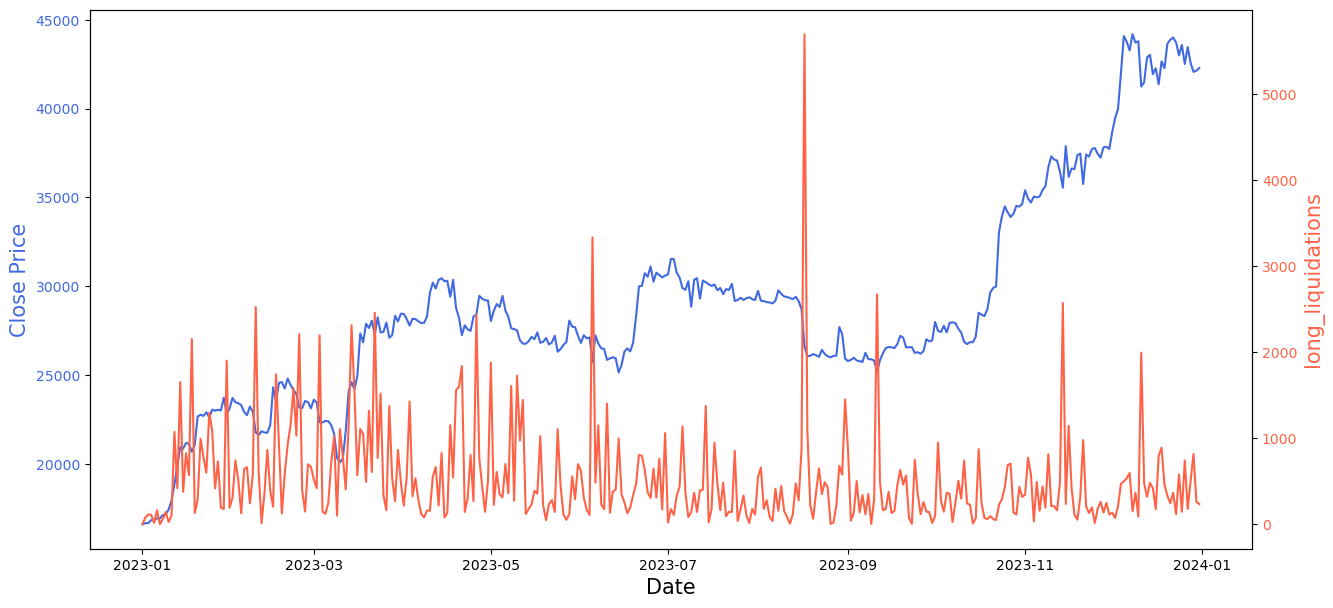

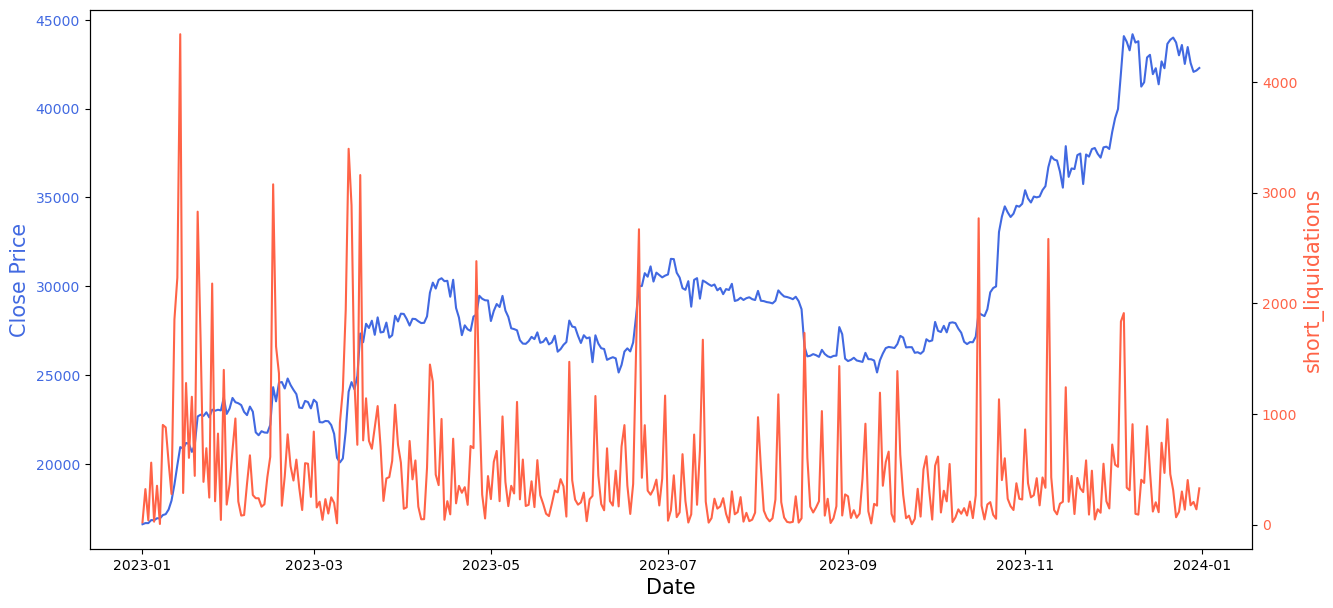

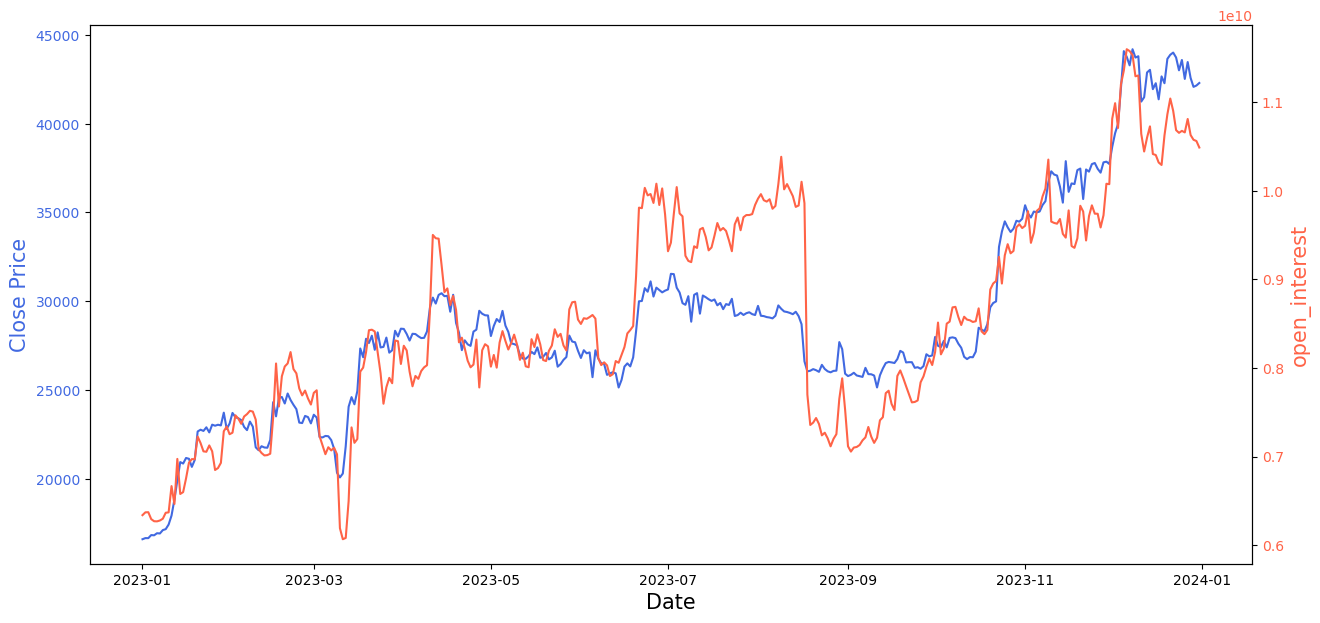

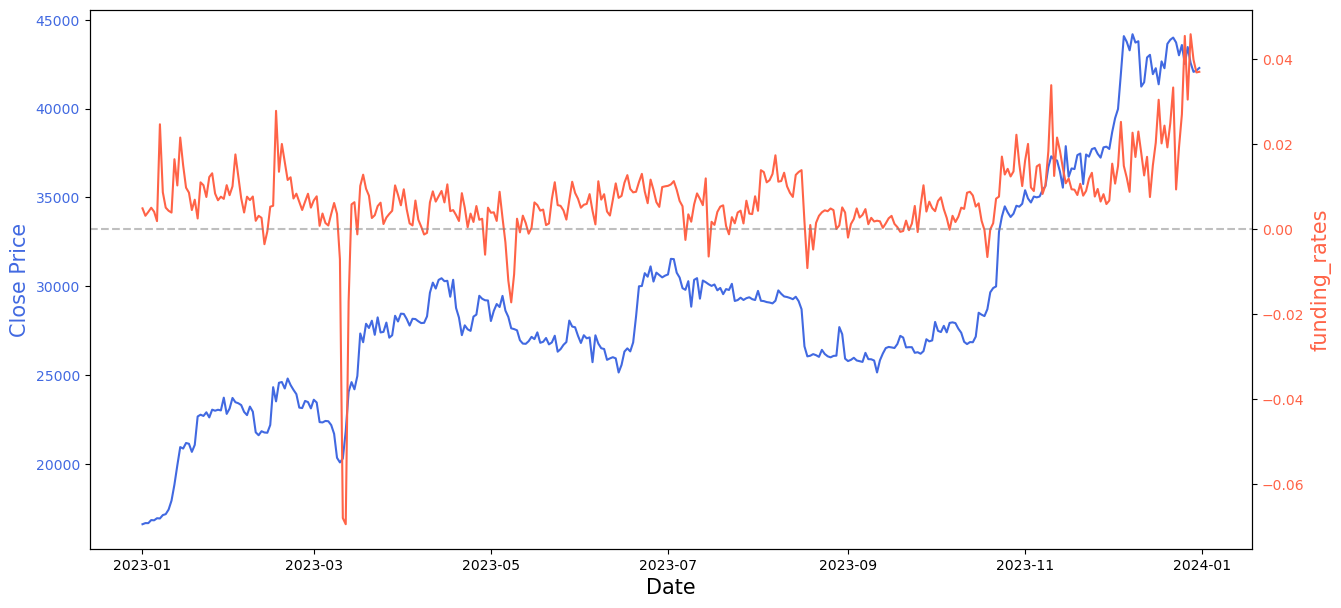

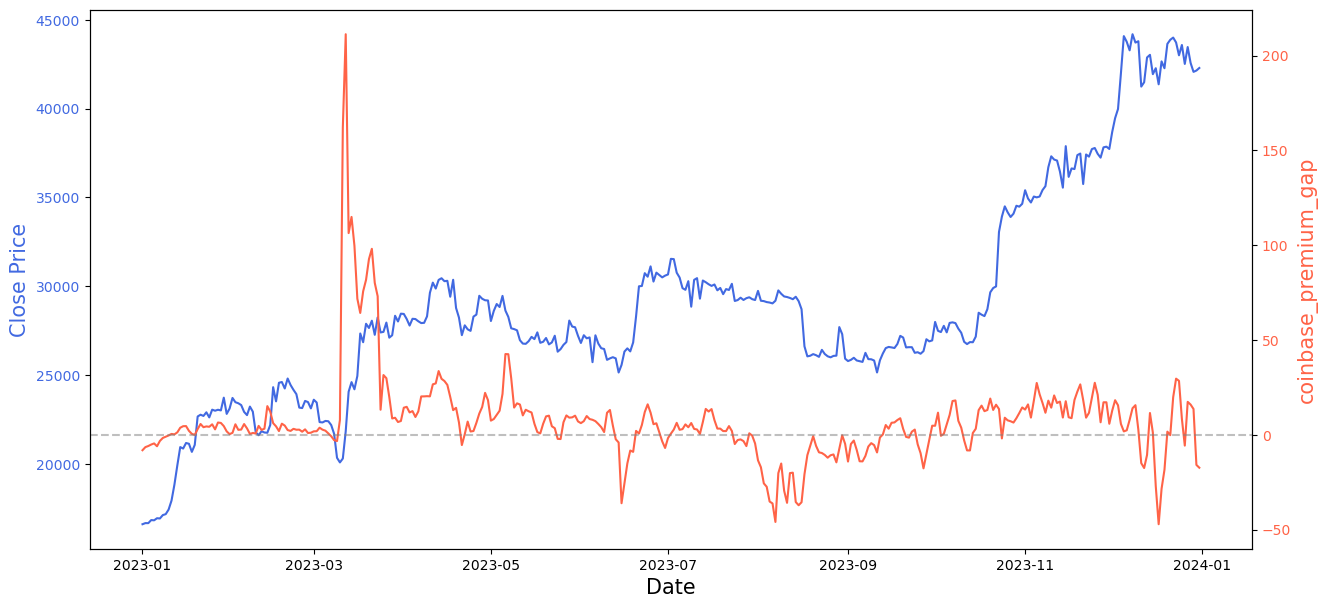

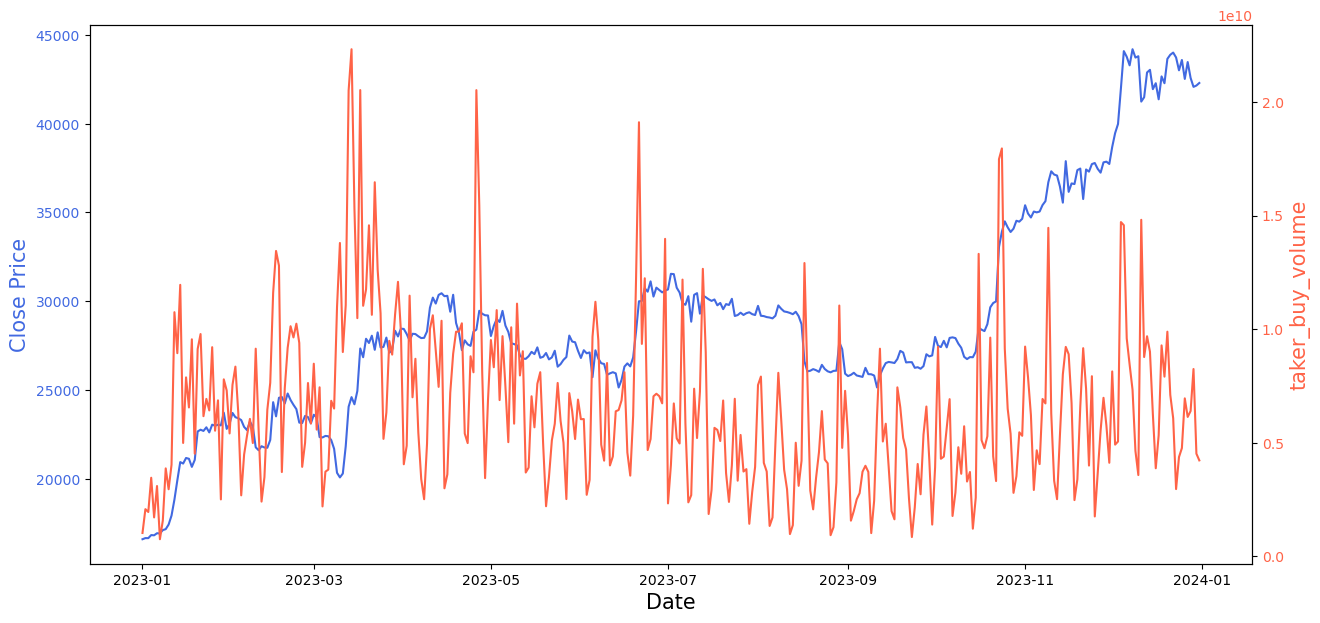

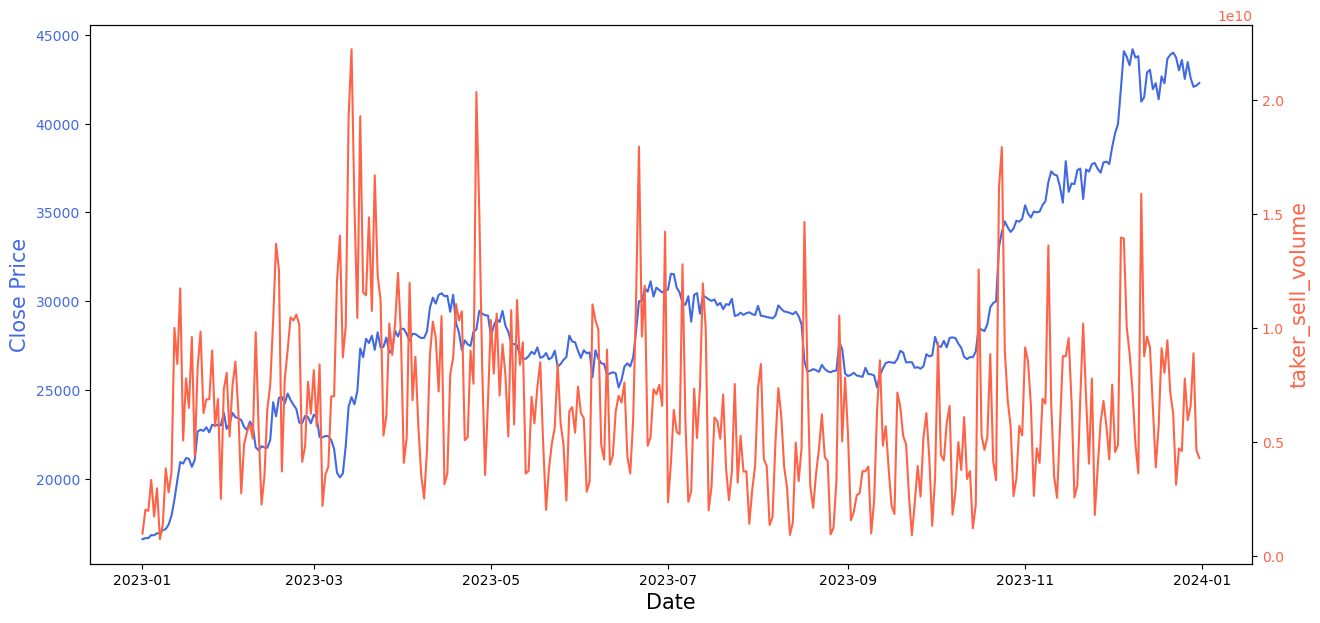

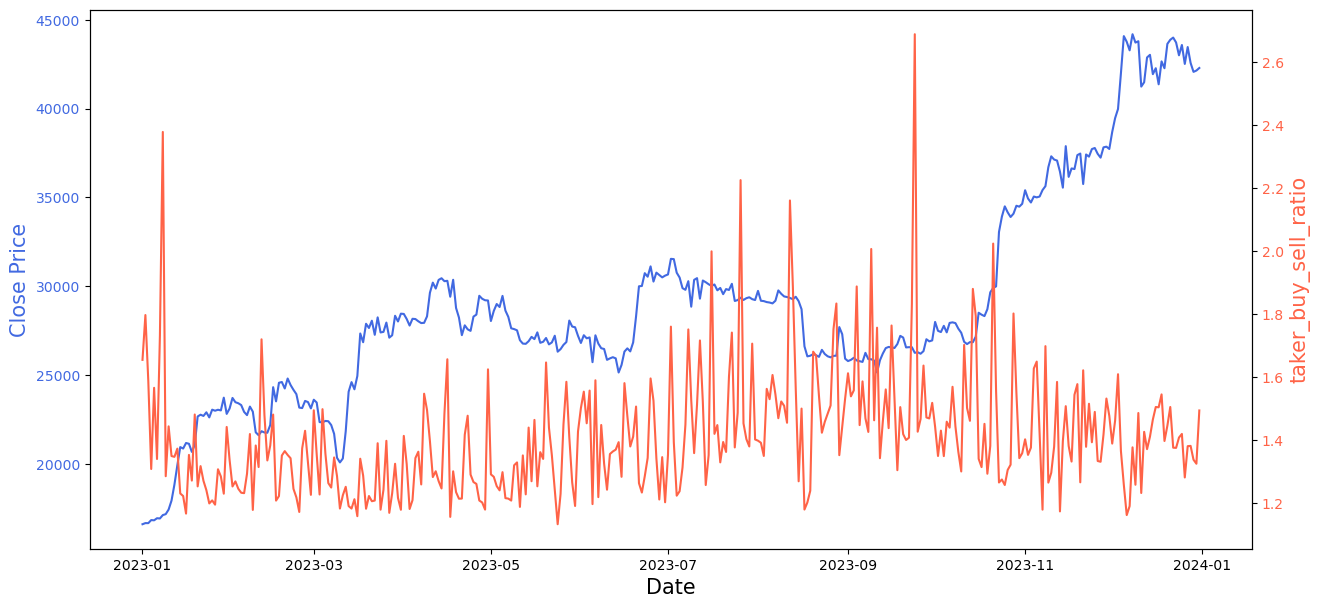

In [30]:

for column in daily_train.columns:
    # 필요없거나 겹치는 컬럼들을 제외하고 플롯
    if column in features:
        fig, ax1 = plt.subplots(1, 1, figsize=(15, 7))
        # Close 가격 그래프 (왼쪽 y축)
        ax1.plot(daily_train['date'], daily_train['close'], color='royalblue', label='close')
        ax1.set_xlabel('Date', fontsize=15)
        ax1.set_ylabel('Close Price', color='royalblue', fontsize=15)
        ax1.tick_params(axis='y', labelcolor='royalblue')

        # column 그래프를 위한 두 번째 y축 생성
        ax2 = ax1.twinx()
        ax2.plot(daily_train['date'], daily_train[column], color='tomato', label='volume')
        ax2.set_ylabel(column, color='tomato', fontsize=15)
        ax2.tick_params(axis='y', labelcolor='tomato')
        # 0 이상인지 0 미만인지 중요한 피처들에 대해 수평선을 그려줌
        if column in ['funding_rates', 'coinbase_premium_gap']:
            # 0인 수평선 추가 (회색, 알파값 낮춤)
            ax2.axhline(y=0, color='gray', alpha=0.5, linestyle='--')

plt.show()

### 롱, 숏 청산과 가격 사이의 관계
가격이 급락하는 날짜와 롱 청산이 대부분 일치하지만 모든 급락에 대해 롱 청산이 크진 않고

또한 가격이 오를 때도 롱 청산이 높아지는 경우도 관측된다

숏 청산도 롱 청산과 반대의 상황에 대해 같은 경향성을 보인다

기본적으로는 급등 시에 숏 청산도 높아지는 경향이 주를 이룬다

### open interest 와 close 가격은 놀라운 정도의 비슷한 경향을 가진다
여차하면 2024년 데이터에 대해 open interest를 활용하여 close 가격을 예측해 보는 것도 가능할지도?

### funding rates와 premium gap들은 가격 과의 관계가 명확히 그래프 상으로 와닿지 않는다

### 가격이 급변하는 날엔 buy, sell volume 다 높은 편이다, 각각의 절대값 또는 둘의 합이 크다면 변동이 큰 0, 3번 클래스일 가능성이 높을것같다

0, 3 사이의 분류는 거래량의 절대값, 1, 2 클래스 사이의 분류는 거래량의 차이 등을 이용하면 어떨까 싶다

## volume과 funding rates, open interests 와의 관계 플롯

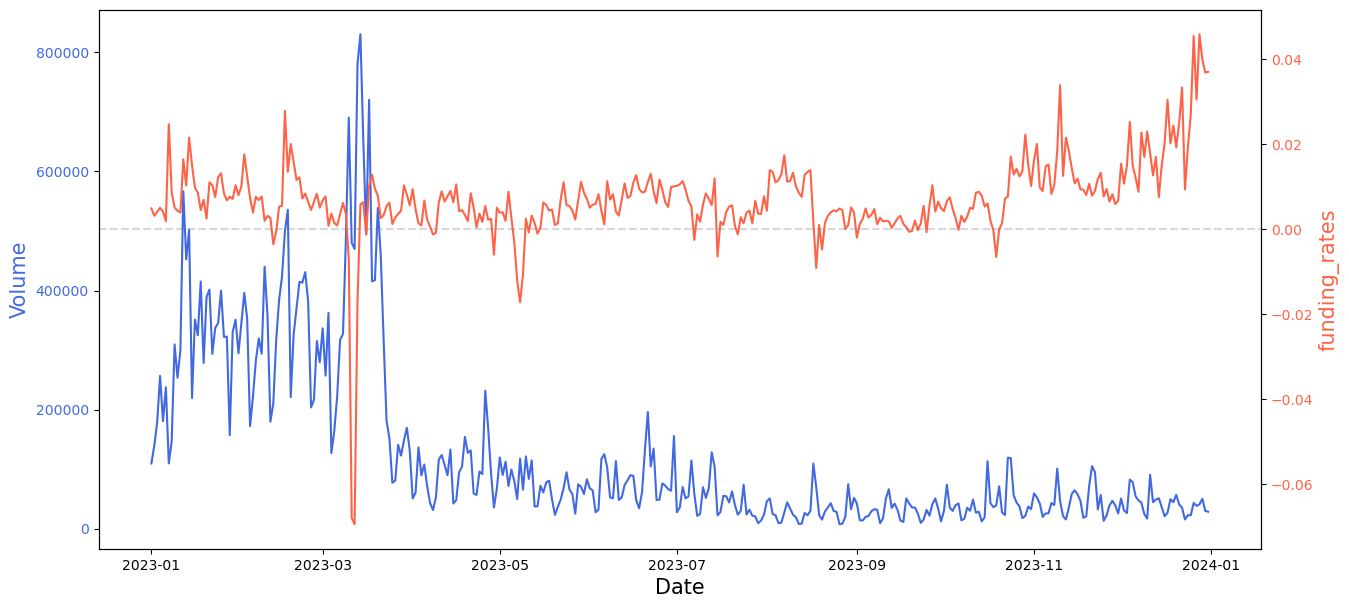

In [31]:
fig, ax1 = plt.subplots(1, 1, figsize=(15, 7))
# volume 가격 그래프 (왼쪽 y축)
ax1.plot(daily_train['date'], daily_train['volume'], color='royalblue', label='volume')
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Volume', color='royalblue', fontsize=15)
ax1.tick_params(axis='y', labelcolor='royalblue')

# funding_rates 그래프를 위한 두 번째 y축 생성
ax2 = ax1.twinx()
ax2.plot(daily_train['date'], daily_train['funding_rates'], color='tomato', label='volume')
ax2.set_ylabel('funding_rates', color='tomato', fontsize=15)
ax2.tick_params(axis='y', labelcolor='tomato')
# 0인 수평선 추가 (회색, 알파값 낮춤)
ax2.axhline(y=0, color='gray', alpha=0.3, linestyle='--')
plt.show()

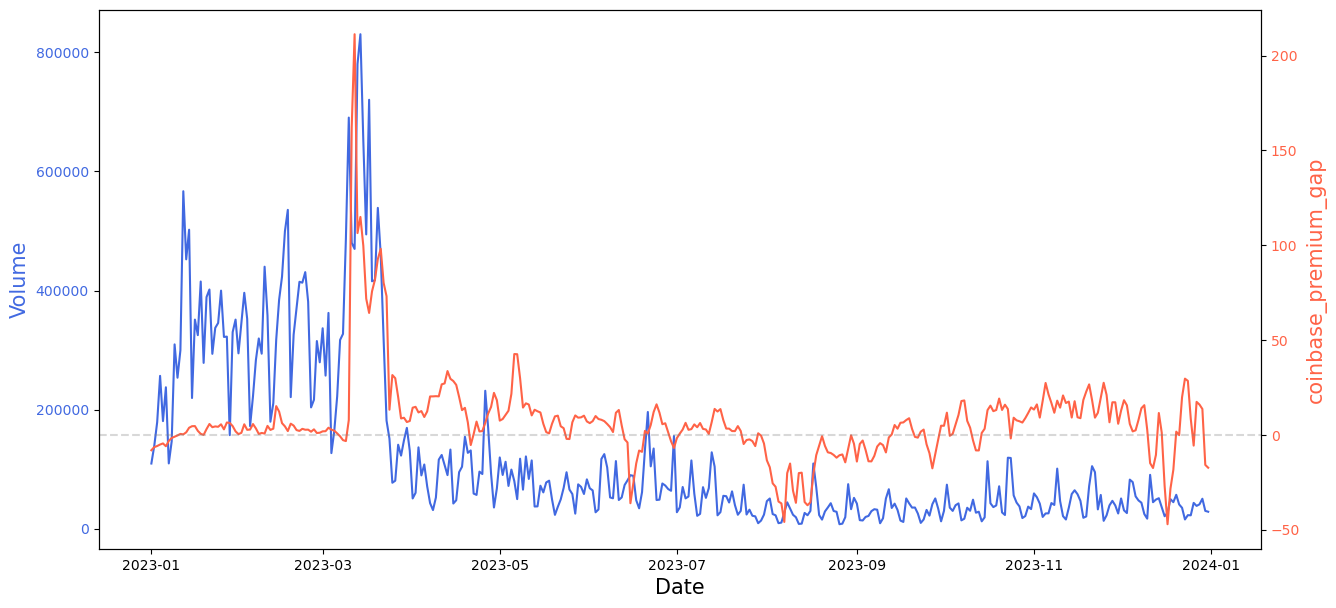

In [32]:
fig, ax1 = plt.subplots(1, 1, figsize=(15, 7))
# volume 가격 그래프 (왼쪽 y축)
ax1.plot(daily_train['date'], daily_train['volume'], color='royalblue', label='volume')
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Volume', color='royalblue', fontsize=15)
ax1.tick_params(axis='y', labelcolor='royalblue')

# coinbase_premium_gap 그래프를 위한 두 번째 y축 생성
ax2 = ax1.twinx()
ax2.plot(daily_train['date'], daily_train['coinbase_premium_gap'], color='tomato', label='volume')
ax2.set_ylabel('coinbase_premium_gap', color='tomato', fontsize=15)
ax2.tick_params(axis='y', labelcolor='tomato')
# 0인 수평선 추가 (회색, 알파값 낮춤)
ax2.axhline(y=0, color='gray', alpha=0.3, linestyle='--')
plt.show()

### 각각 volume 과의 관계도 살펴보았지만 항상 3월달이 특히 하다는 것 말고는 연관 관계 도출이 안된다

가격 또는 거래량과의 관계가 아니라 가격 변동량, 롱과 숏의 차이 등 과의 관계가 오히려 뭐가 있을 수 있겠다

In [33]:
train.describe()

datetime       target  long_liquidations  \
count                 8760  8760.000000        8760.000000   
mean   2023-07-02 11:30:00     1.518379          21.825362   
min    2023-01-01 00:00:00     0.000000           0.000000   
25%    2023-04-02 05:45:00     1.000000           0.065153   
50%    2023-07-02 11:30:00     2.000000           1.435885   
75%    2023-10-01 17:15:00     2.000000          11.696054   
max    2023-12-31 23:00:00     3.000000        2074.411754   
std                    NaN     0.776190          81.898243   

       short_liquidations  long_liquidations_usd  short_liquidations_usd  \
count         8760.000000           8.760000e+03            8.760000e+03   
mean            20.358808           6.071689e+05            5.702627e+05   
min              0.000000           0.000000e+00            0.000000e+00   
25%              0.090000           1.902380e+03            2.522571e+03   
50%              1.757044           4.222273e+04            5.109667e+04   
75%             11.560663           3.315181e+05            3.404167e+05   
max           3469.520396           6.862527e+07            6.939000e+07   
std             78.887752           2.215628e+06            2.029690e+06   

       open_interest  funding_rates  coinbase_premium_gap  \
count   8.760000e+03    8760.000000           8755.000000   
mean    8.552820e+09       0.007165              7.227744   
min     2.805553e+09      -0.097568           -442.600000   
25%     7.612698e+09       0.002940             -1.870000   
50%     8.335249e+09       0.006679              4.360000   
75%     9.599136e+09       0.010653             12.775000   
max     1.179230e+10       0.067024            317.180000   
std     1.233032e+09       0.010700             25.619763   

       coinbase_premium_index         close         volume  taker_buy_volume  \
count             8755.000000   8760.000000    8760.000000      8.760000e+03   
mean                 0.026271  28797.311293    5068.806648      2.713101e+08   
min                 -1.576211  16519.005107     116.496744      1.109395e+07   
25%                 -0.007260  25927.520671    1005.763158      9.913835e+07   
50%                  0.016112  27698.872221    2080.778155      1.723347e+08   
75%                  0.041825  30241.233602    6001.937086      3.200573e+08   
max                  1.504902  44537.263059  106106.465006      5.701178e+09   
std                  0.103918   5885.741786    7614.047475      3.157187e+08   

       taker_sell_volume  taker_buy_ratio  taker_sell_ratio  \
count       8.760000e+03      8760.000000       8760.000000   
mean        2.728987e+08         0.498115          0.501885   
min         8.559034e+06         0.228366          0.271079   
25%         9.997412e+07         0.466631          0.471499   
50%         1.724167e+08         0.498358          0.501642   
75%         3.212870e+08         0.528501          0.533369   
max         5.343965e+09         0.728921          0.771634   
std         3.144999e+08         0.046195          0.046195   

       taker_buy_sell_ratio  
count           8760.000000  
mean               1.009950  
min                0.295951  
25%                0.874874  
50%                0.993455  
75%                1.120894  
max                2.688956  
std                0.191960

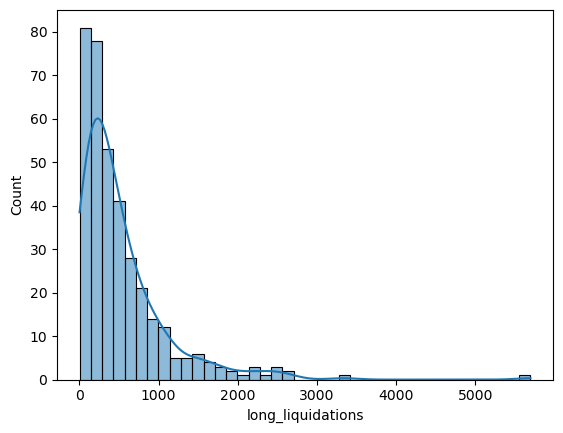

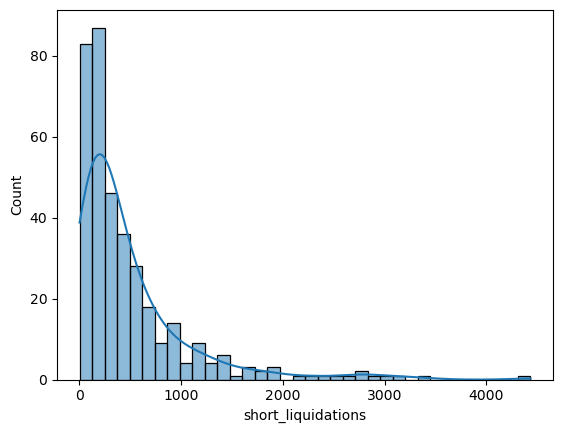

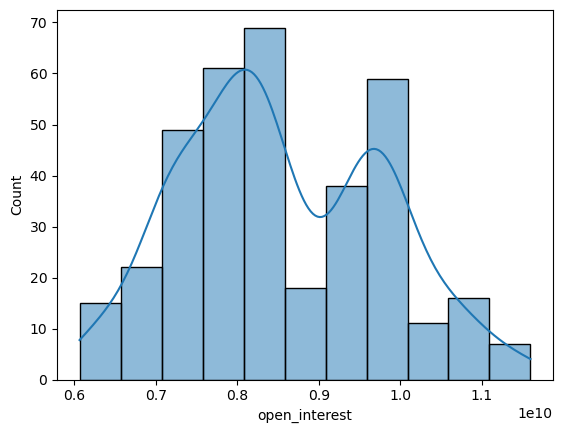

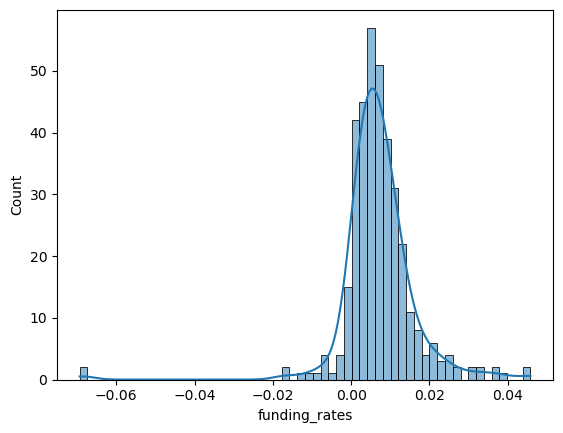

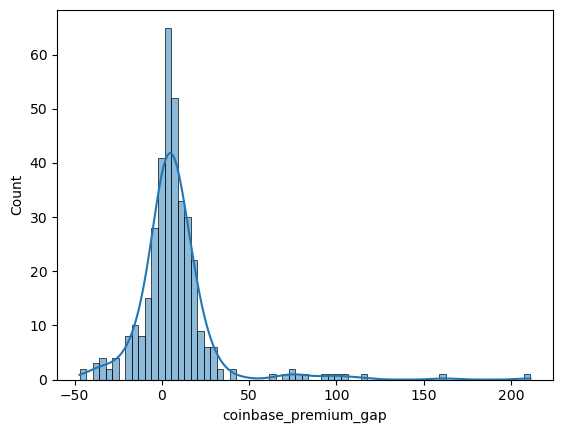

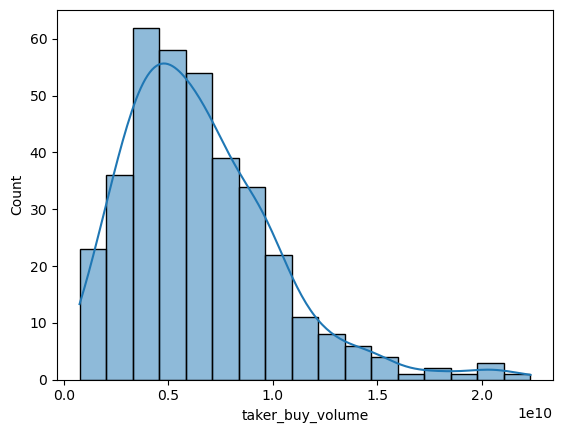

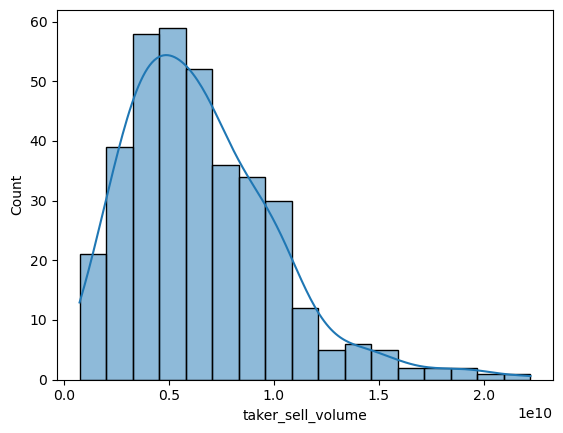

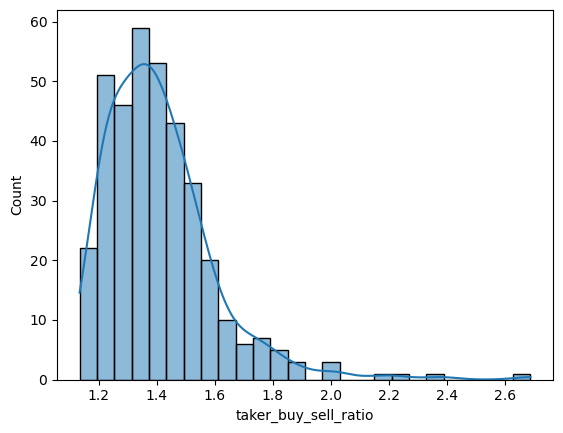

In [34]:

for col in features:
  sns.histplot(daily_train[col], kde=True)
  plt.show()

liquidation들은 오른쪽 꼬리가 길어 diff로 파생변수로 만들어도 꼬리가 길게 나오는지 확인해보고 분포 정규화를 해볼수도 있겠다

buy/sell volume은 ratio까지 셋 다 오른쪽 꼬리가 길어 분포 정규화를 해주는게 어떨까 한다

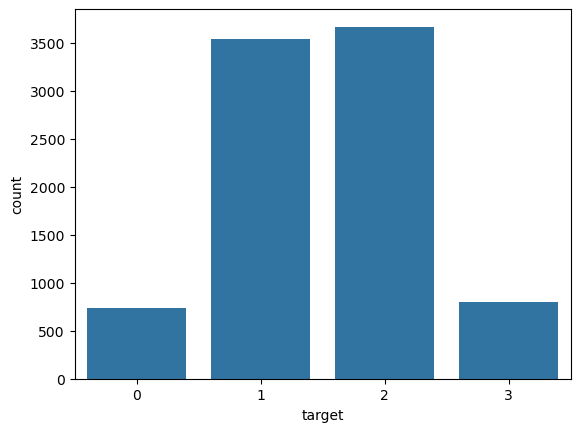

In [35]:
sns.countplot(x='target', data=train)
plt.show()

0과 3, 1과 2를 구별하는 것이 중요할 것 같다

어떻게?

- buy/sell 거래량 차이?
- 롱/숏 청산량 차이?

In [36]:
train['target'].value_counts()

target
2    3671
1    3544
3     805
0     740
Name: count, dtype: int64

In [37]:
train['target'].value_counts(normalize=True)

target
2    0.419064
1    0.404566
3    0.091895
0    0.084475
Name: proportion, dtype: float64

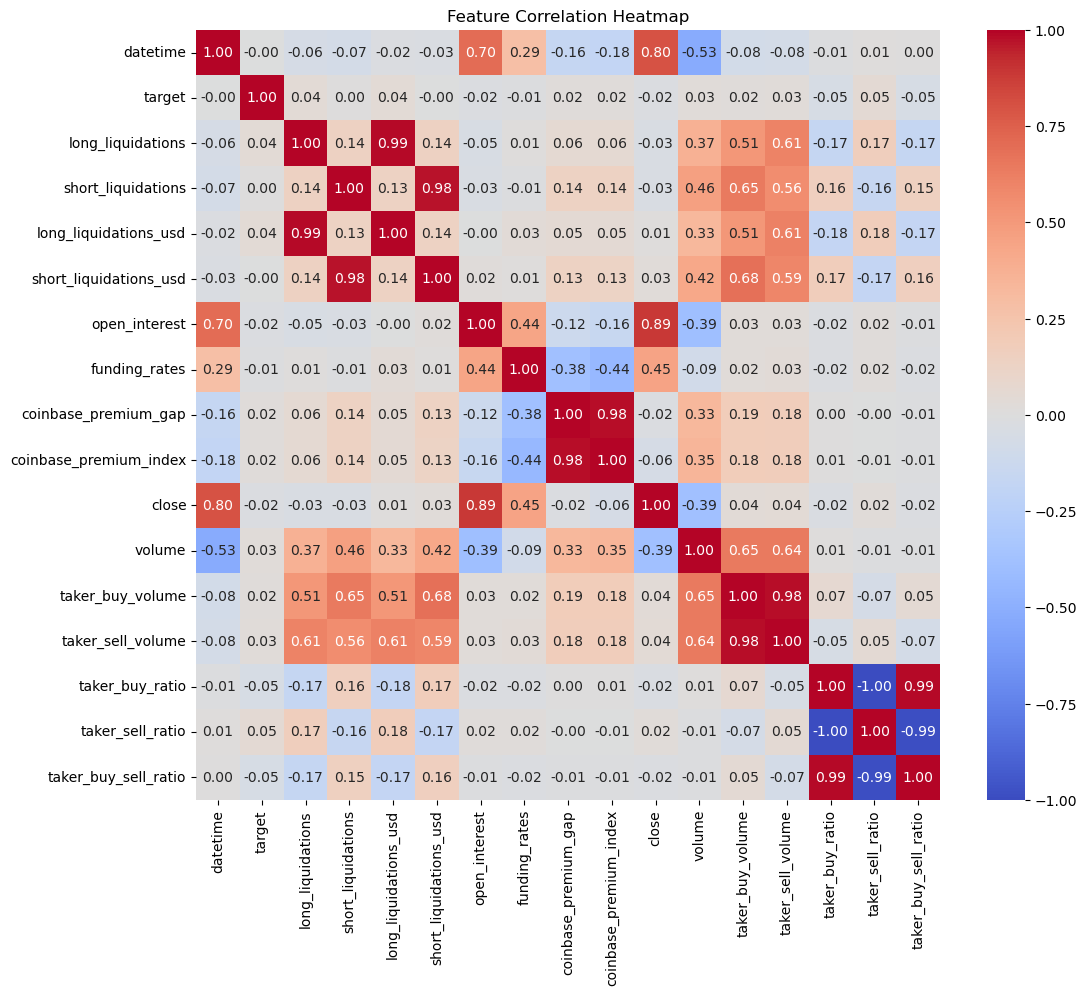

In [38]:
plt.figure(figsize=(12, 10))
sns.heatmap(train.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

target과 높은 상관곗수를 가지는 직접적인 변수는 없었다

파생변수를 생성하거나, close의 변동율을 변수로 잡고 비교해보면 어떨까

### open interest와 close는 무려 0.89의 상관관계를 지닌다

close의 변동율을 open interest의 변동율로 에측해 볼수도 있지 않을까?

## 일단 네트워크 쪽 데이터를 살펴보고 타겟과 연관성이 있는지 확인해보자

In [39]:
tmp = pd.read_csv(data_path +'train.csv')
tmp = tmp.rename(columns={'ID': 'datetime'})
tmp['datetime'] = pd.to_datetime(tmp['datetime'])

network = tmp.merge(network, on='datetime', how='left')
network = network.merge(price, on='datetime', how='left')

In [40]:
network.columns

Index(['datetime', 'target', 'velocity_supply_total_x',
       'velocity_supply_total_y', 'utxo_count', 'difficulty',
       'fees_block_mean', 'fees_block_mean_usd', 'fees_total',
       'fees_total_usd', 'fees_reward_percent', 'tokens_transferred_total',
       'tokens_transferred_mean', 'tokens_transferred_median',
       'transactions_count_total', 'transactions_count_mean',
       'fees_transaction_mean', 'fees_transaction_mean_usd',
       'fees_transaction_median', 'fees_transaction_median_usd', 'block_count',
       'supply_total', 'supply_new', 'hashrate', 'blockreward',
       'blockreward_usd', 'addresses_count_active', 'addresses_count_sender',
       'addresses_count_receiver', 'block_interval', 'block_bytes', 'close',
       'volume'],
      dtype='object')

In [41]:
net_features = ['velocity_supply_total_x',
                'velocity_supply_total_y',
                'utxo_count',
                'difficulty',
                'fees_block_mean',
                'fees_total',
                'fees_reward_percent',
                'tokens_transferred_total',
                'tokens_transferred_mean',
                'transactions_count_total',
                'transactions_count_mean',
                'block_count',
                'supply_total',
                'hashrate',
                'blockreward',
                'addresses_count_active',
                'addresses_count_sender',
                'addresses_count_receiver',
                'block_interval',
                'block_bytes'
]

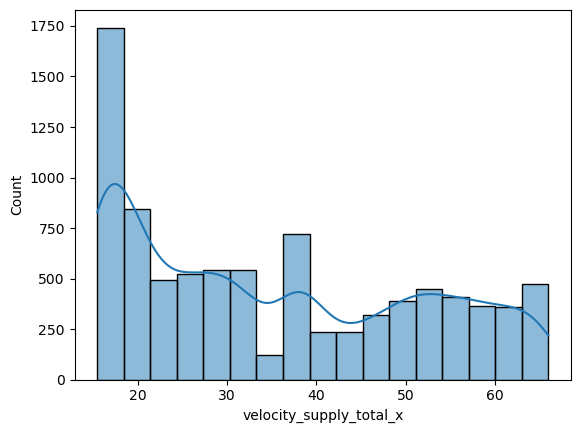

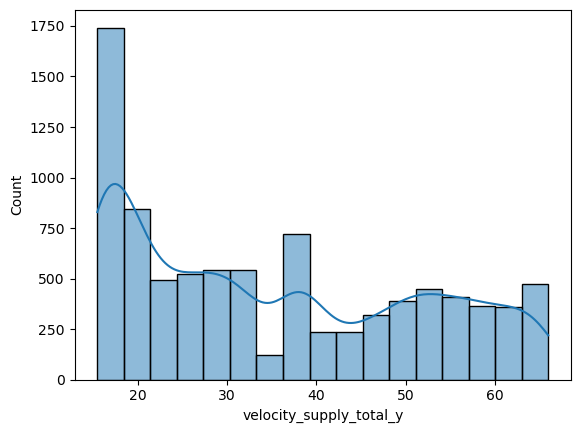

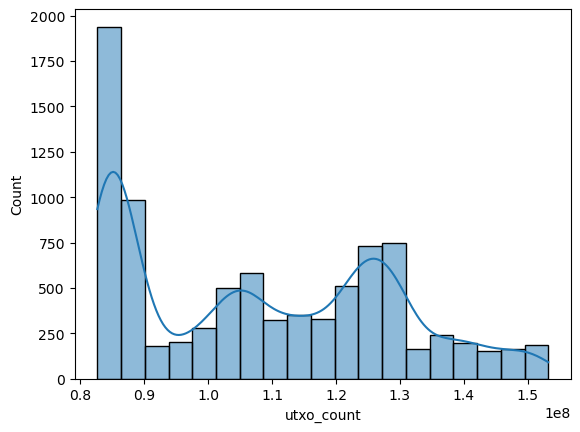

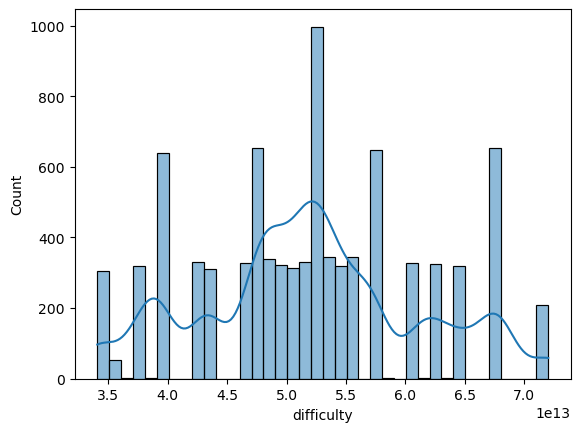

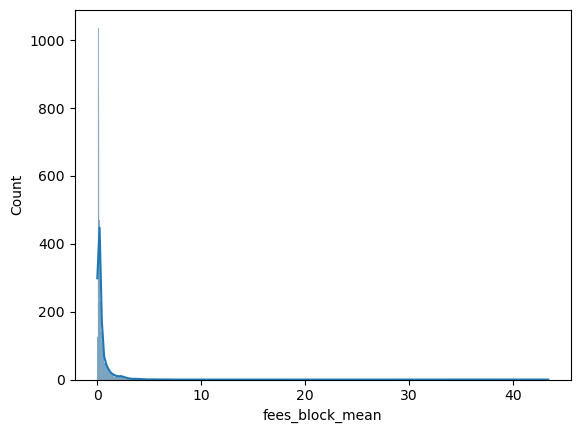

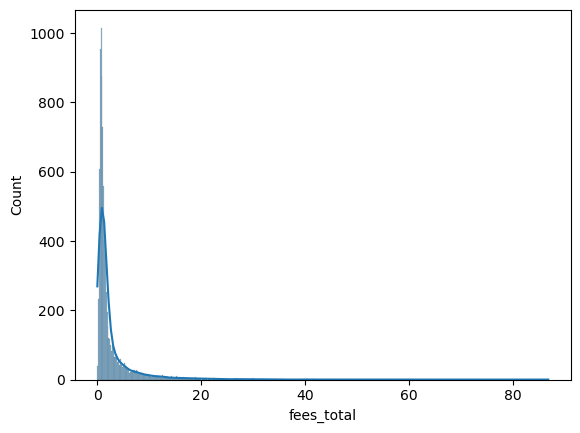

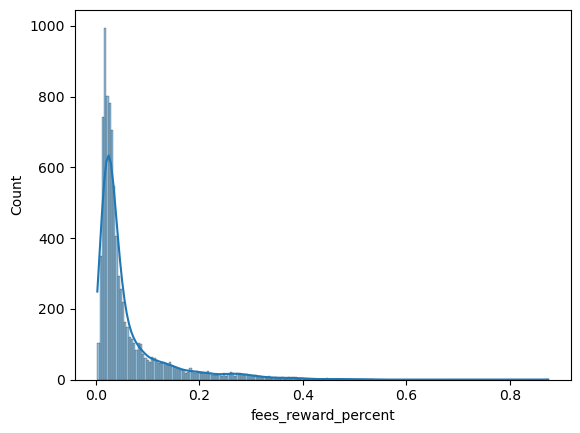

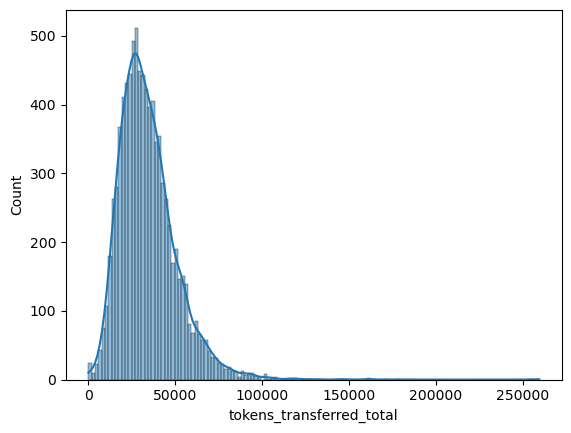

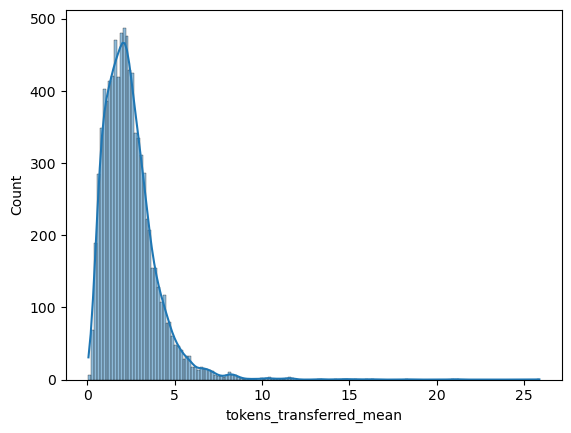

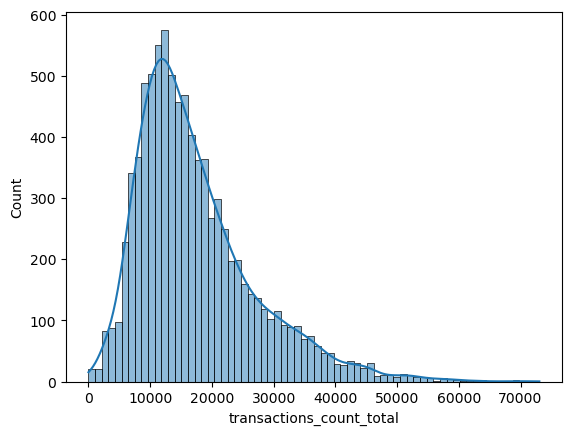

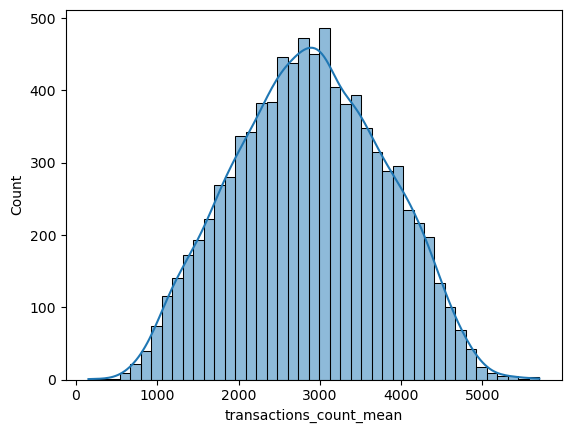

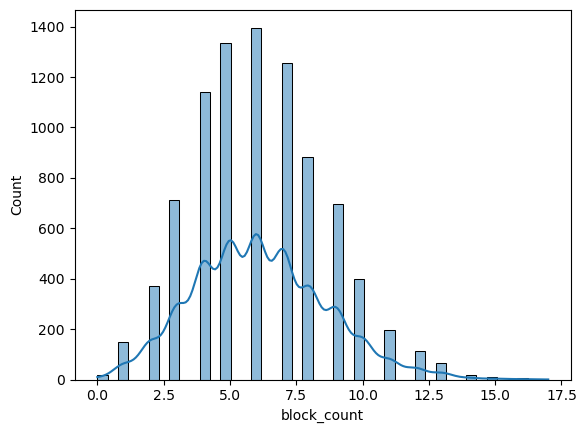

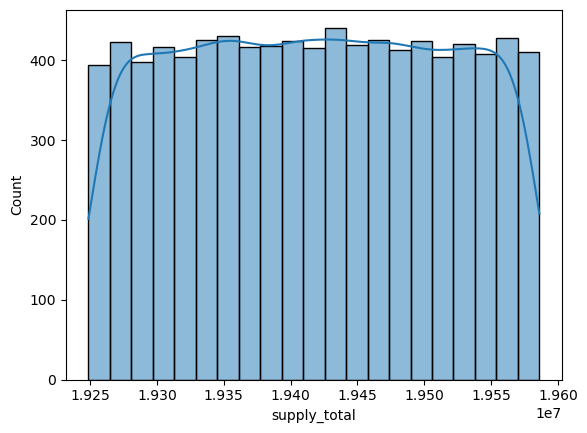

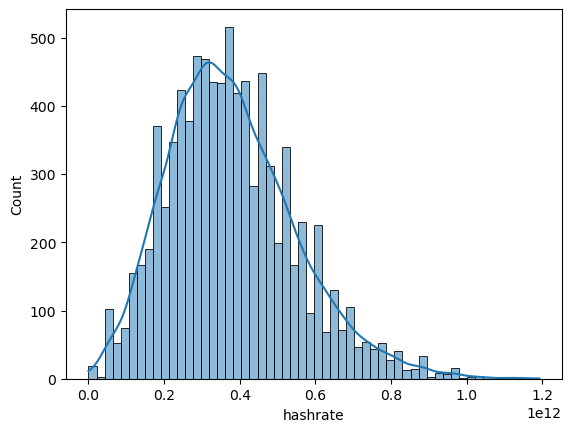

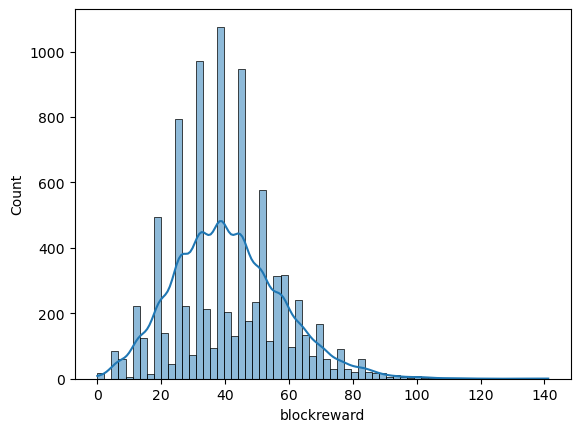

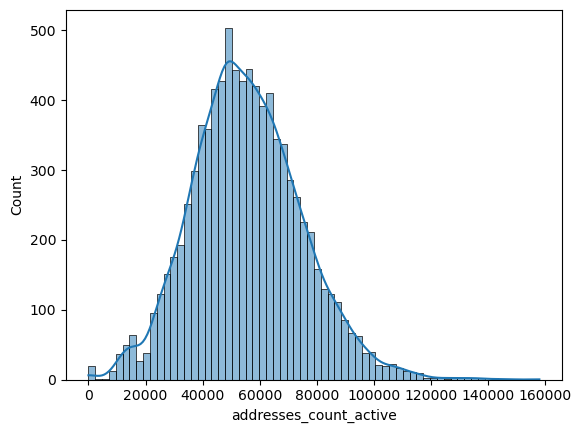

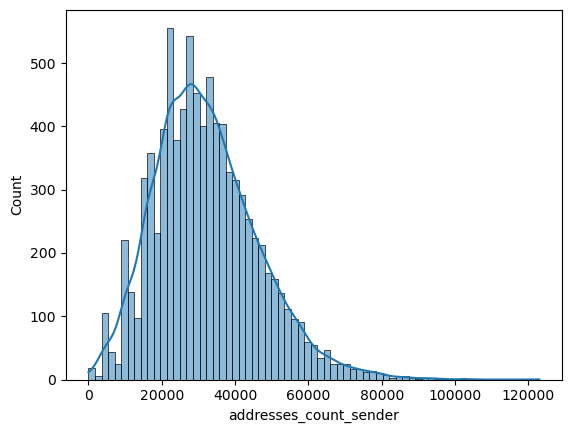

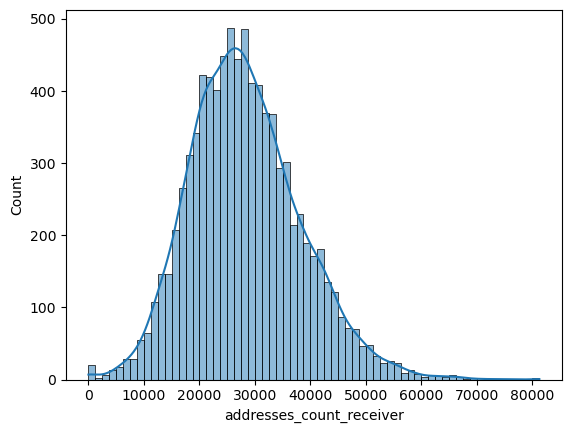

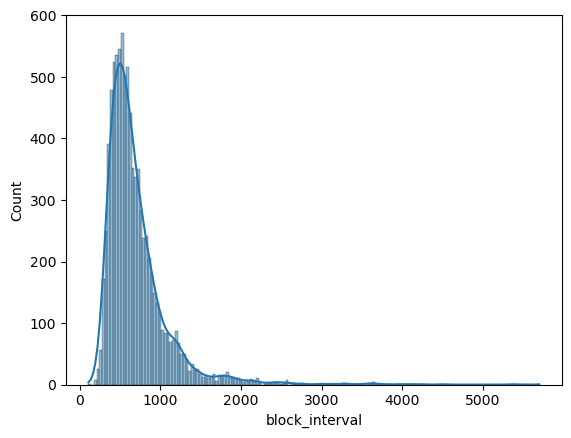

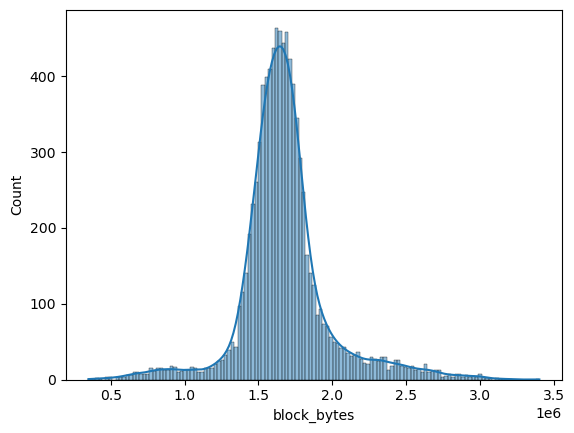

In [42]:
for col in net_features:
  sns.histplot(network[col], kde=True)
  plt.show()

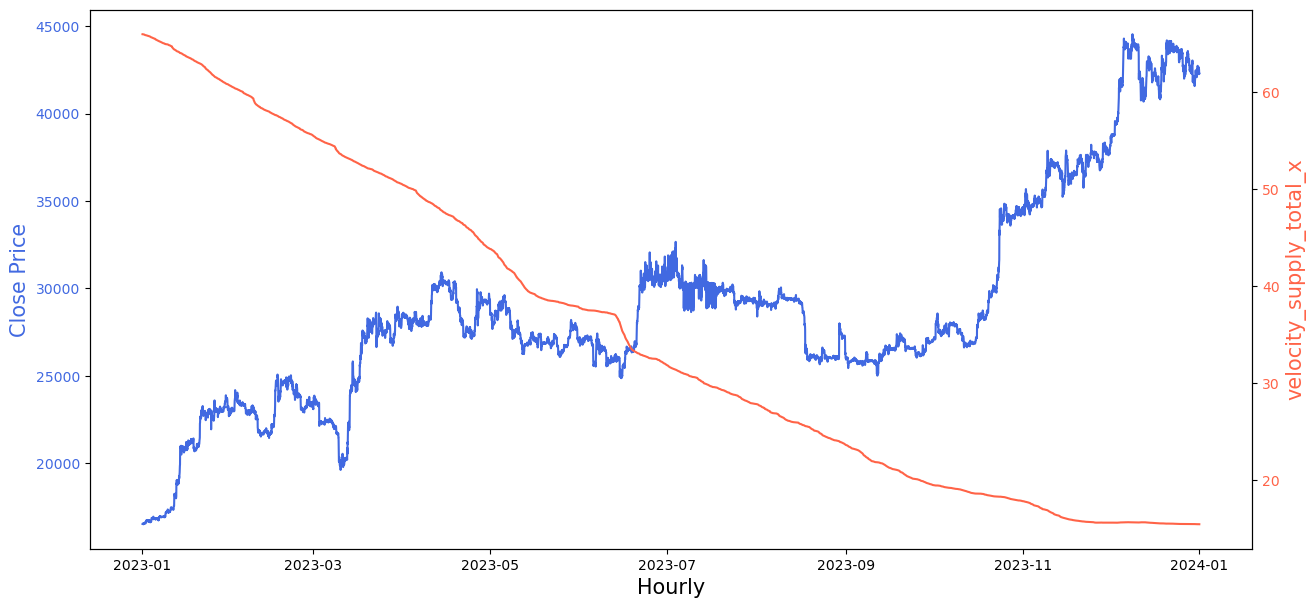

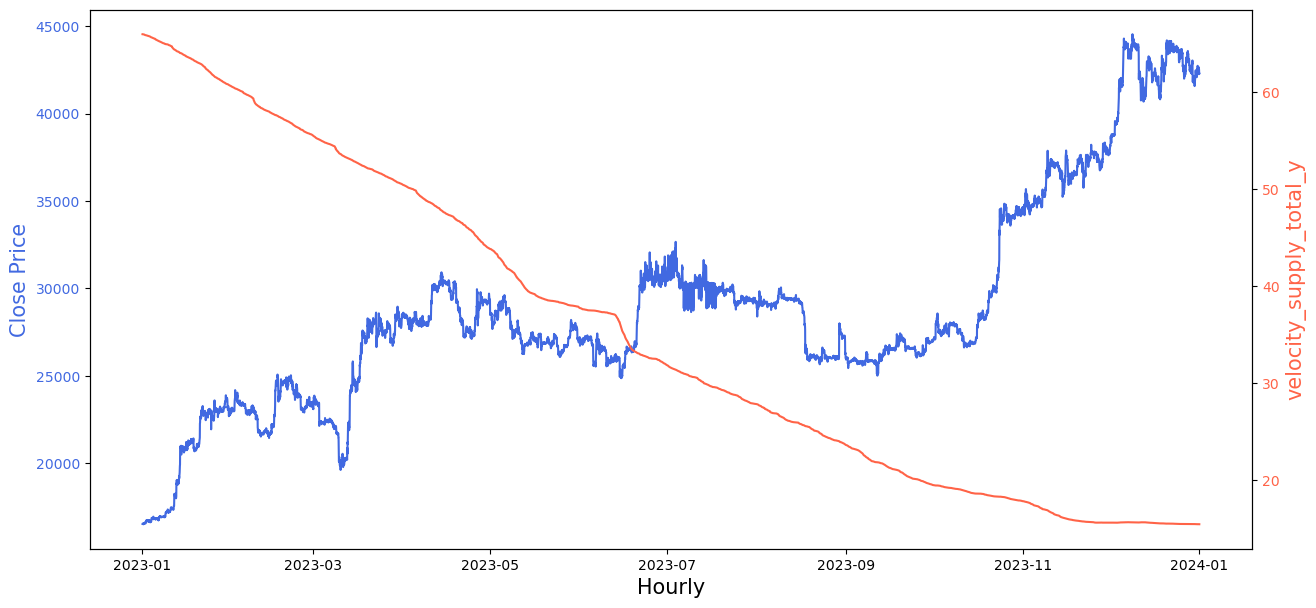

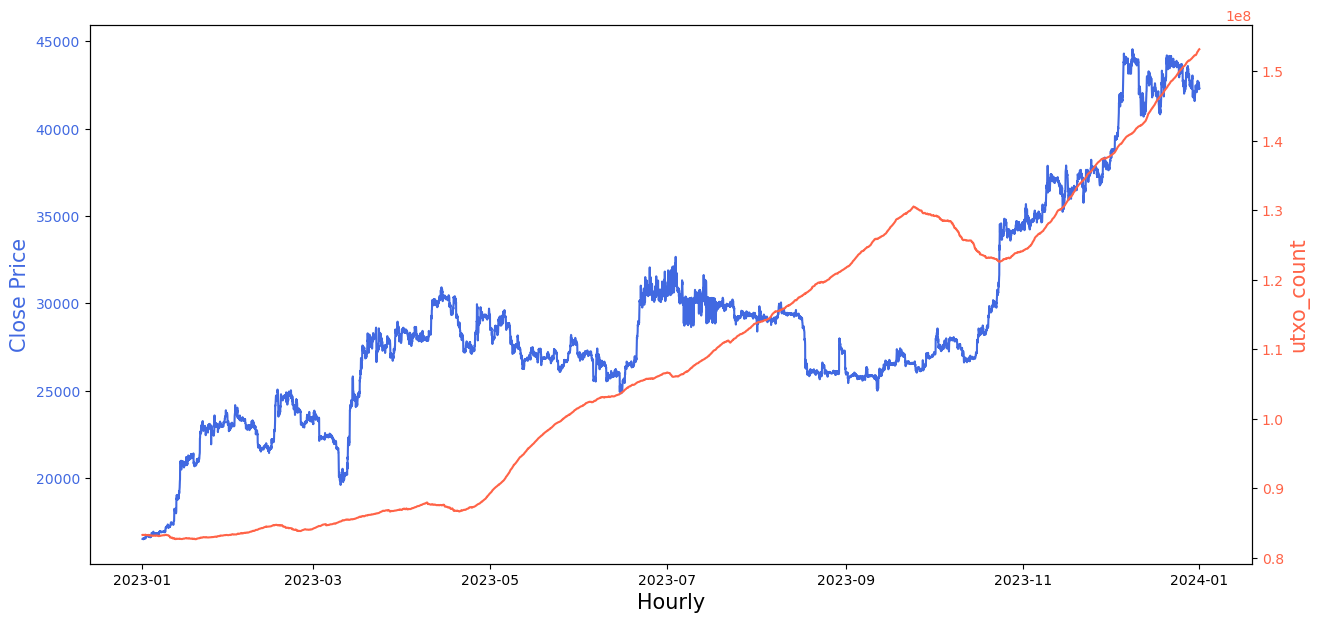

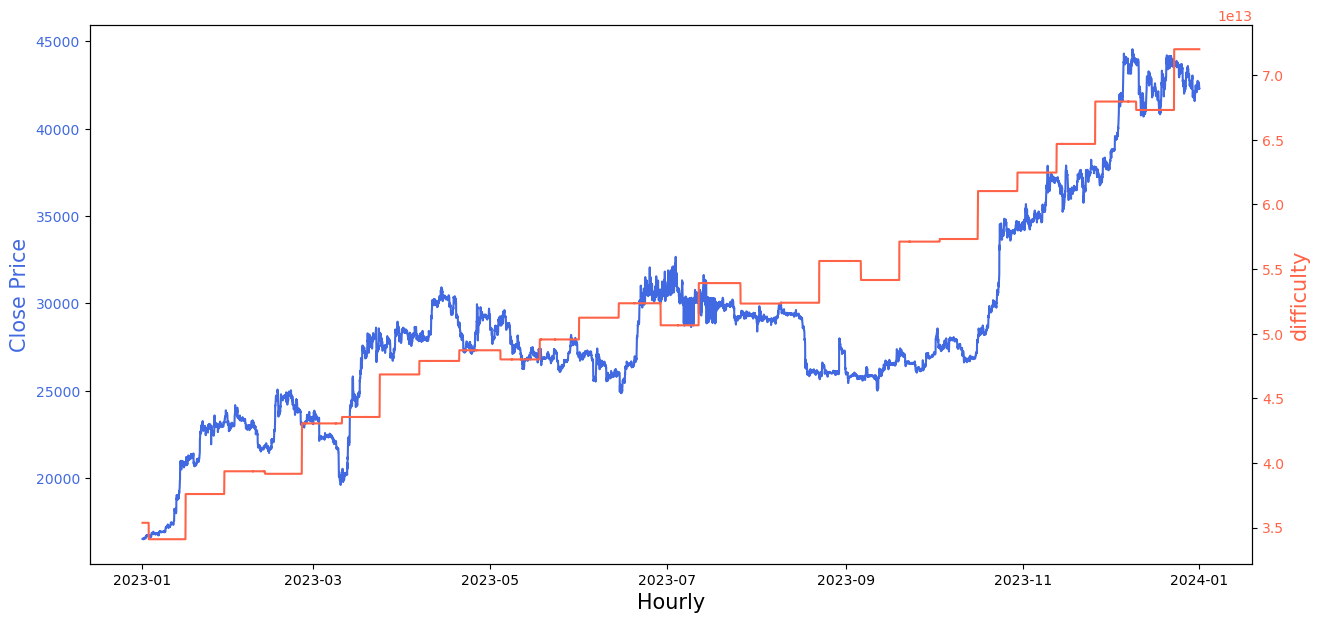

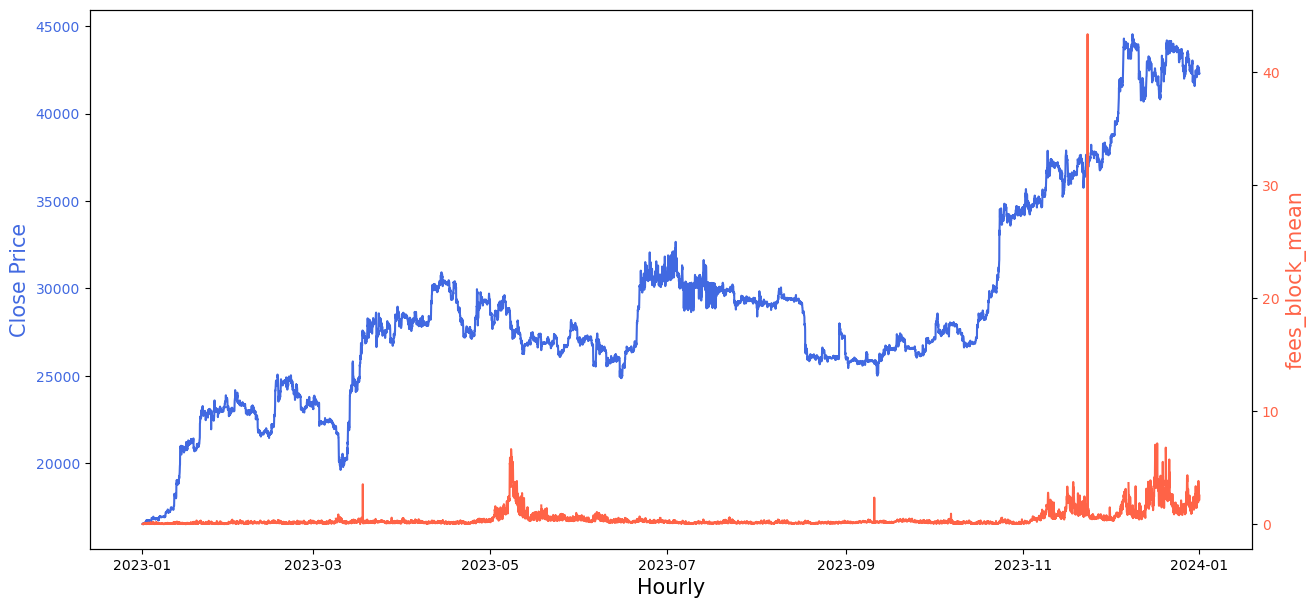

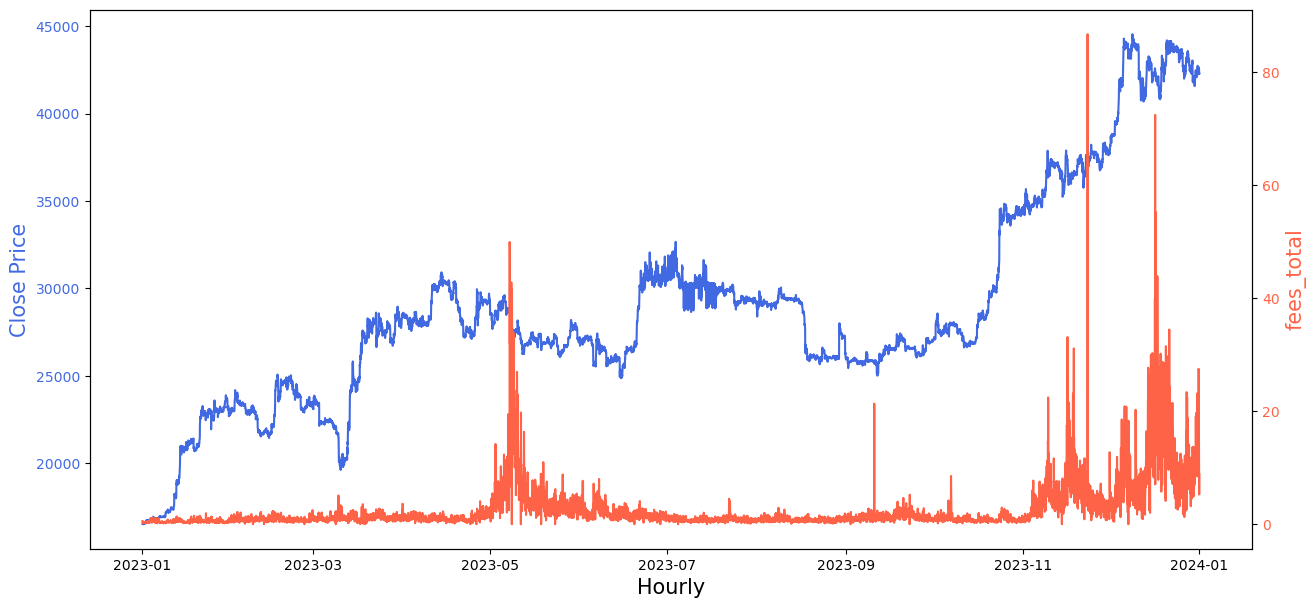

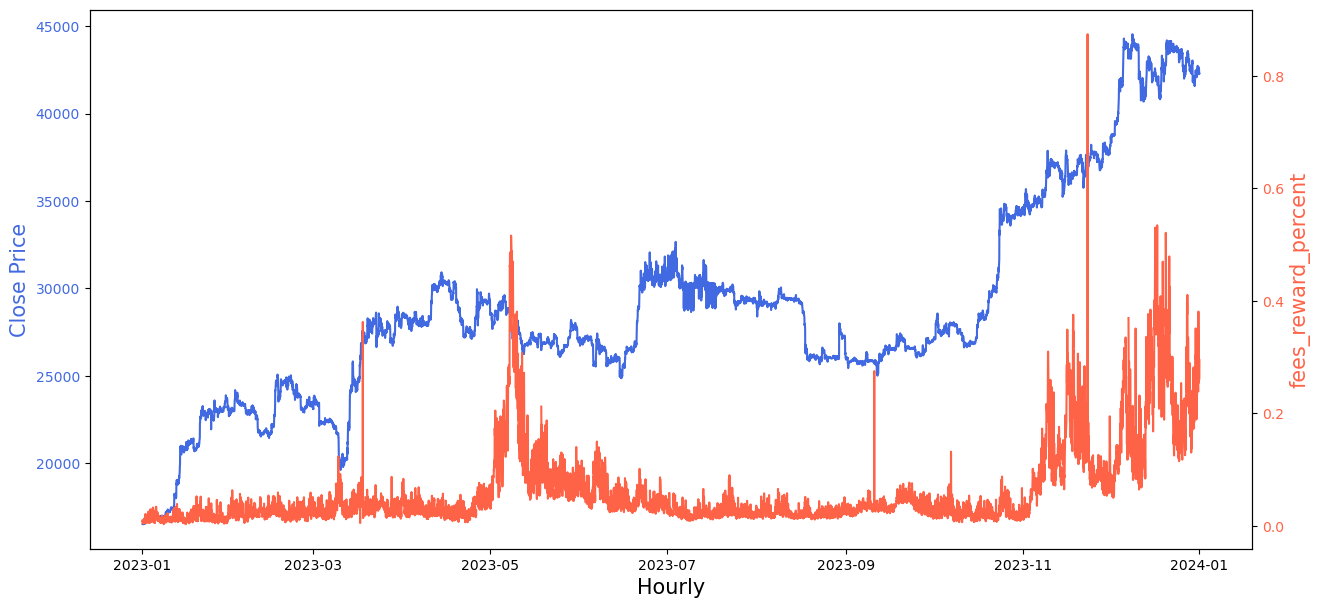

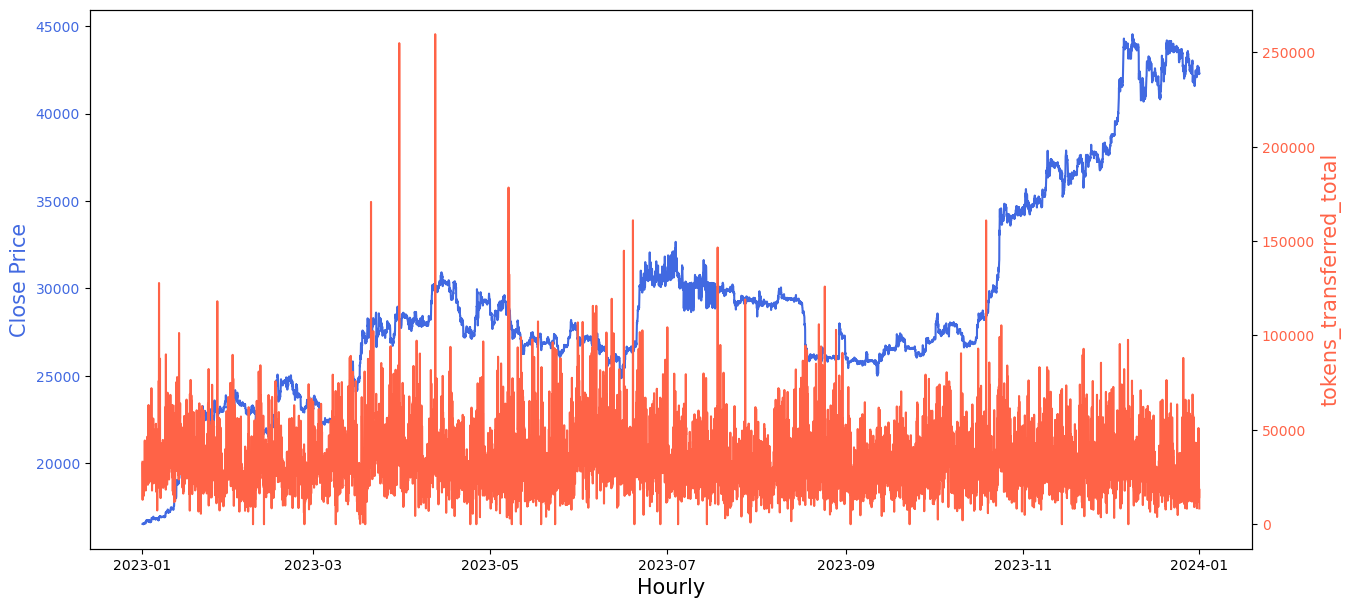

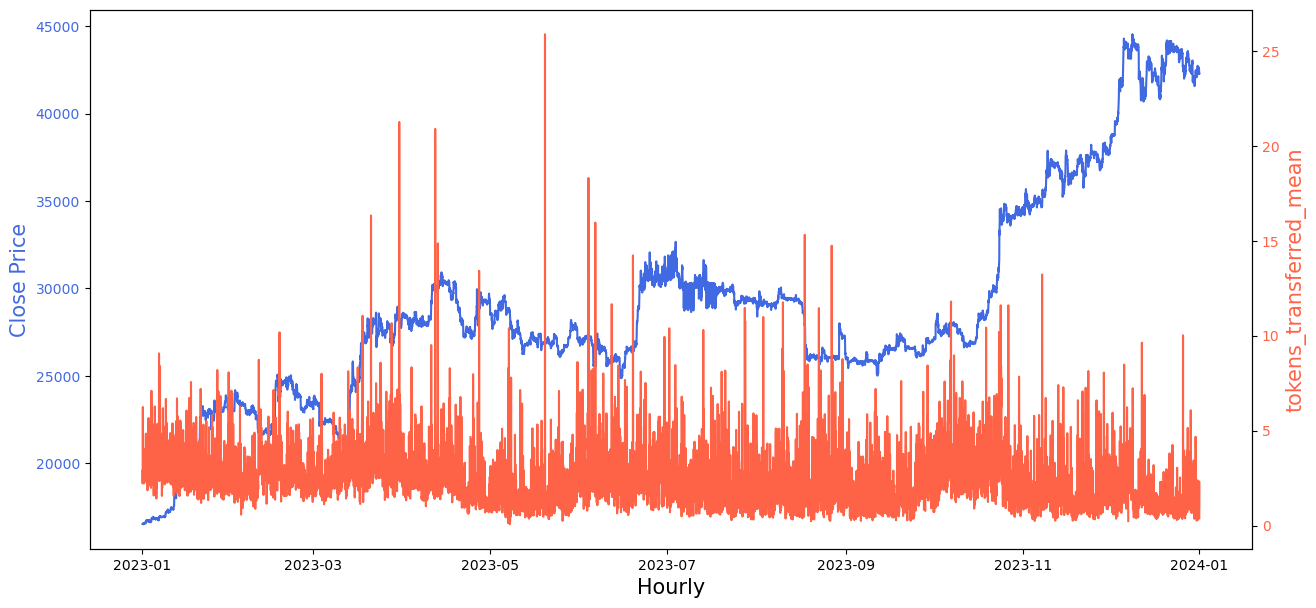

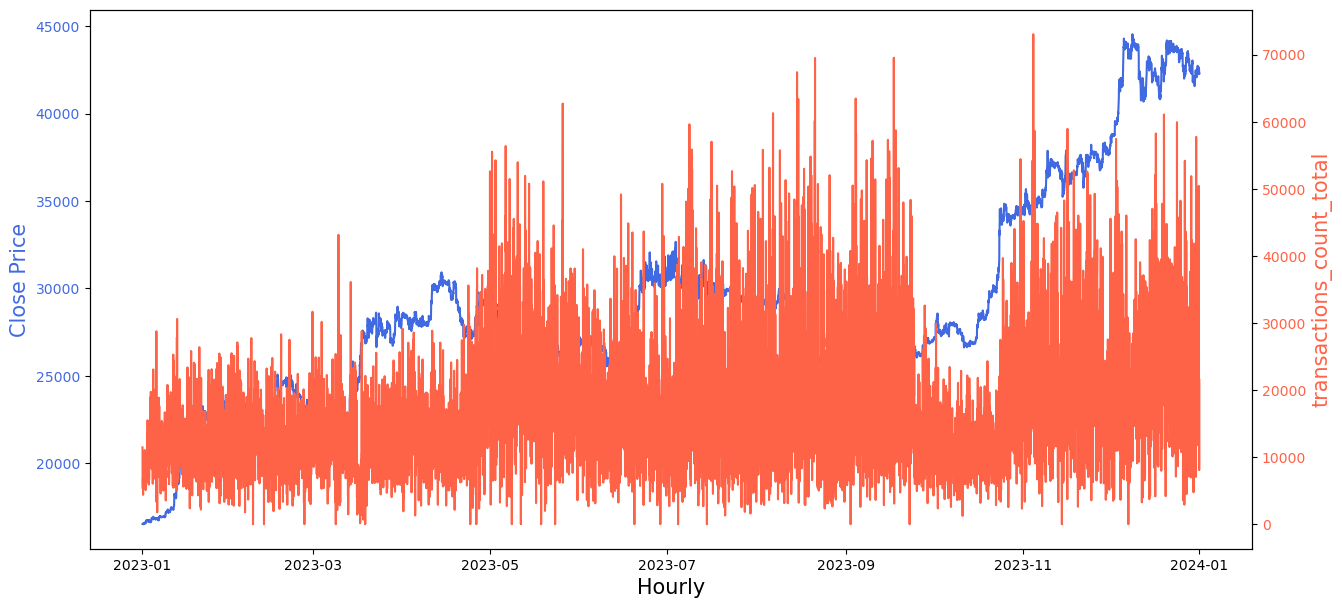

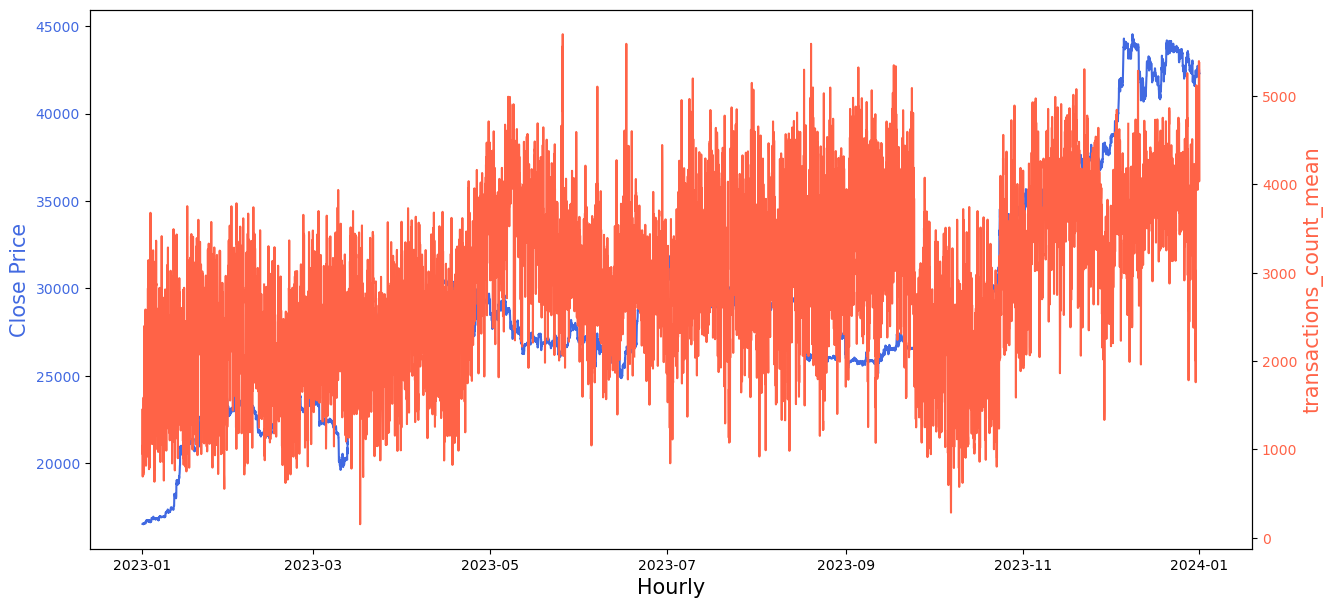

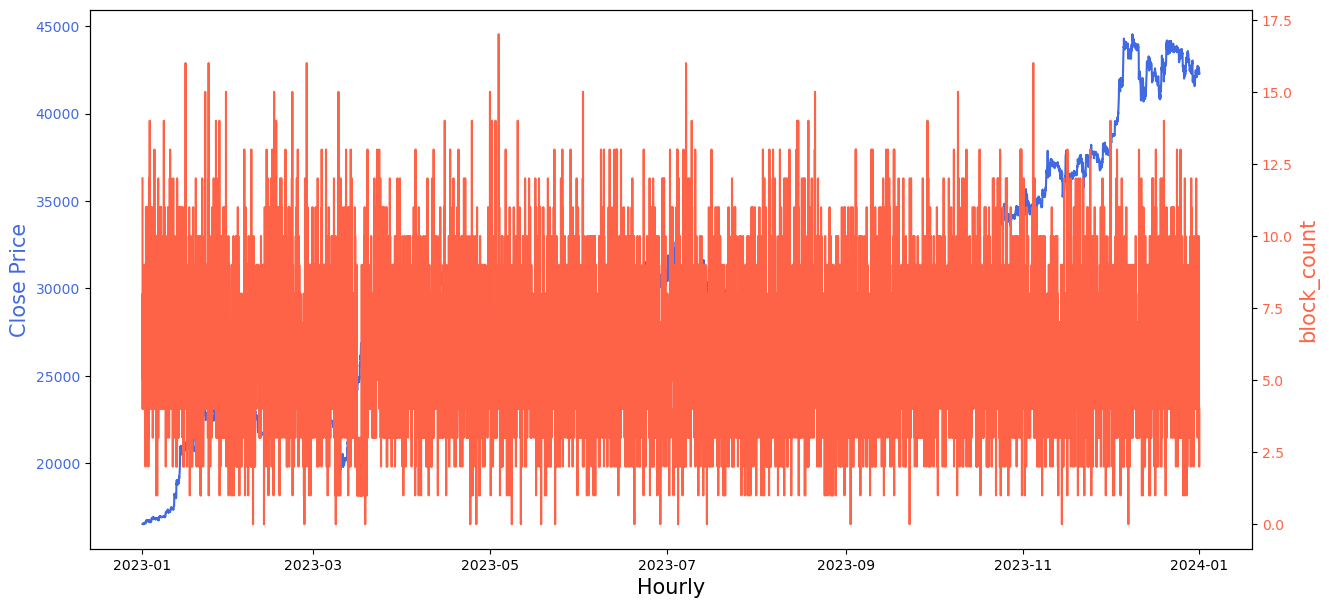

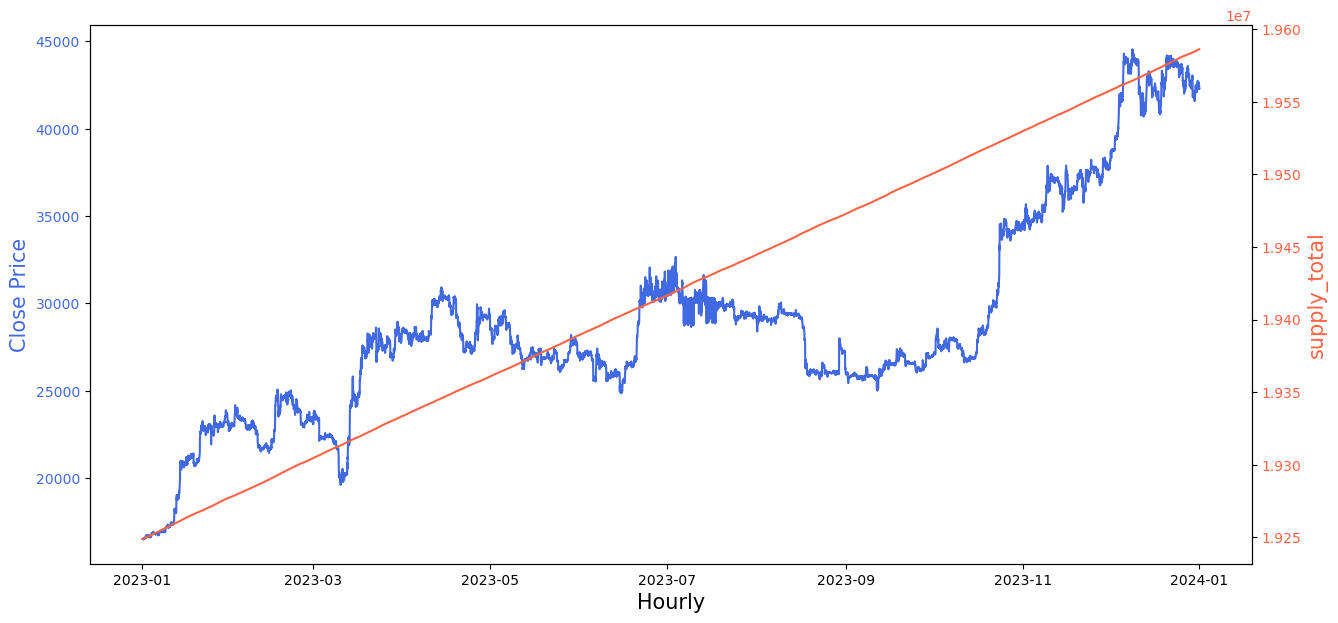

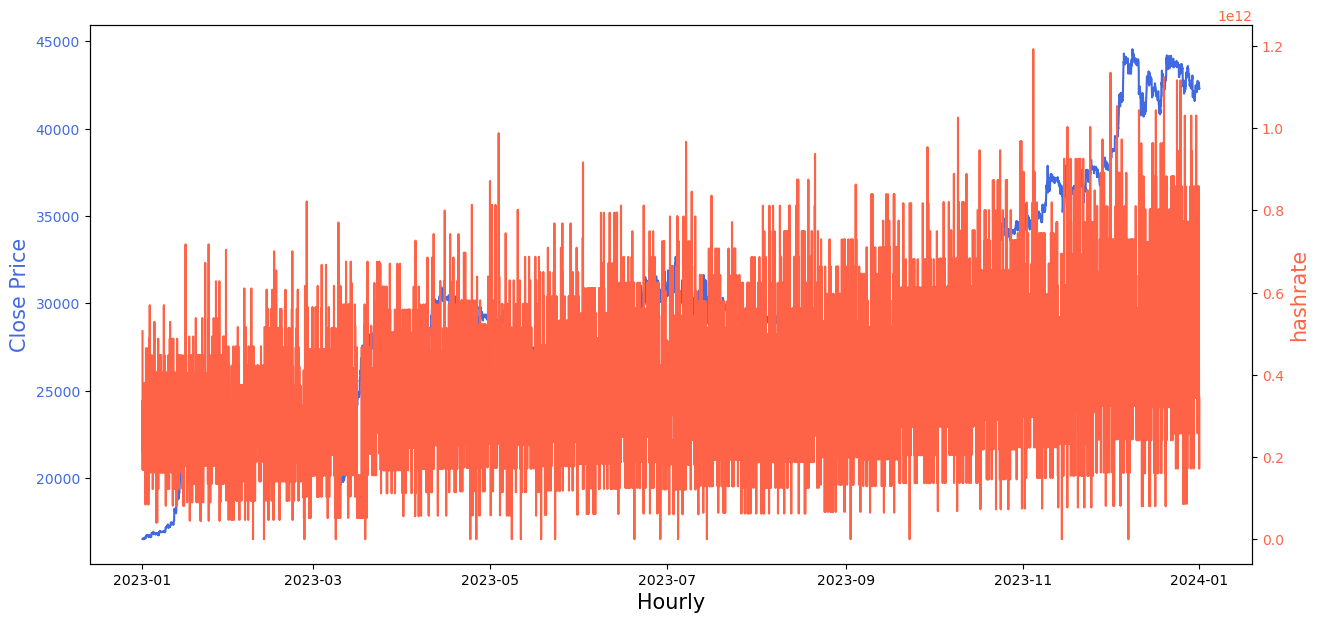

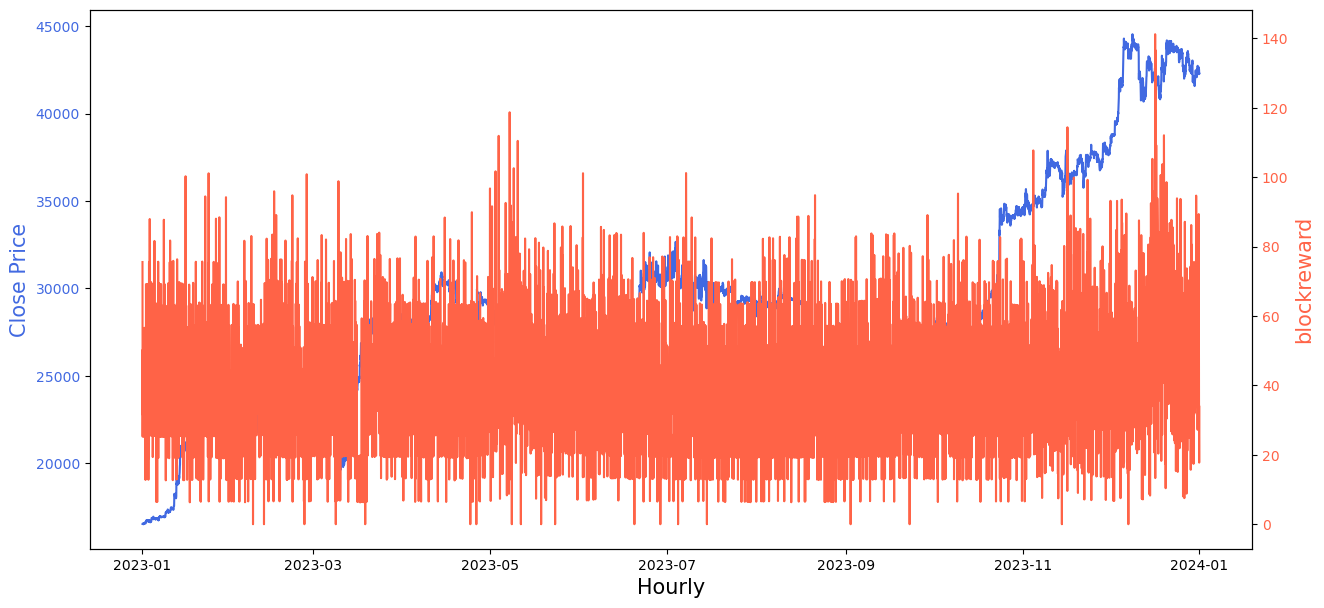

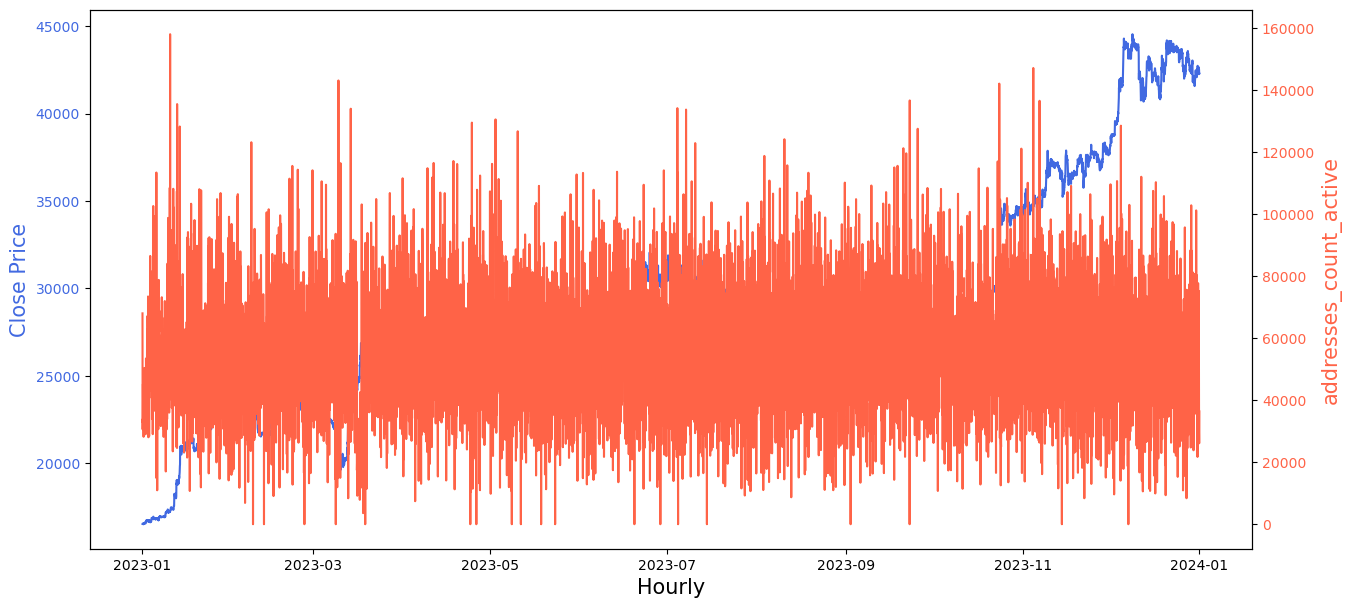

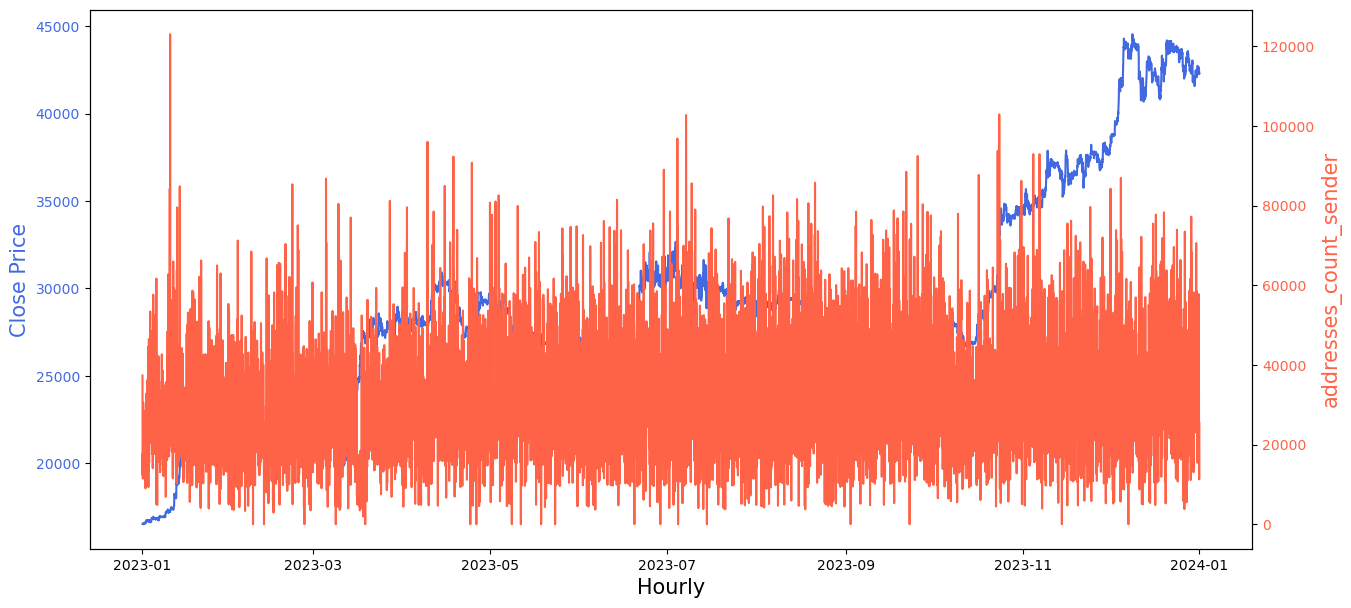

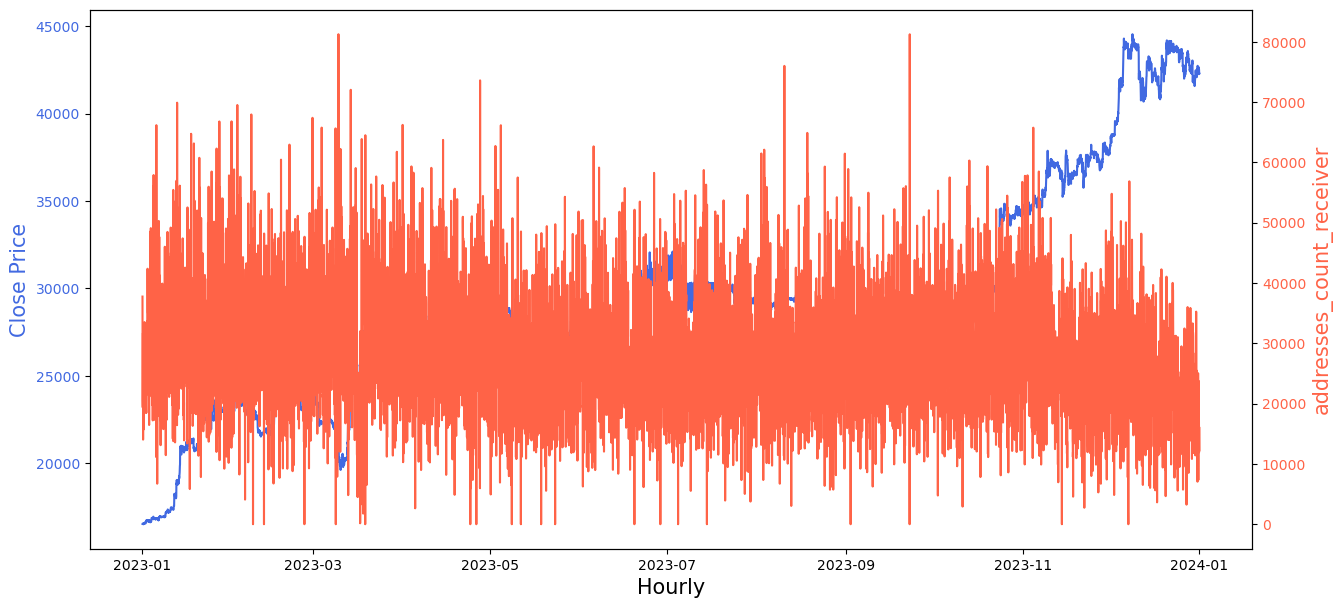

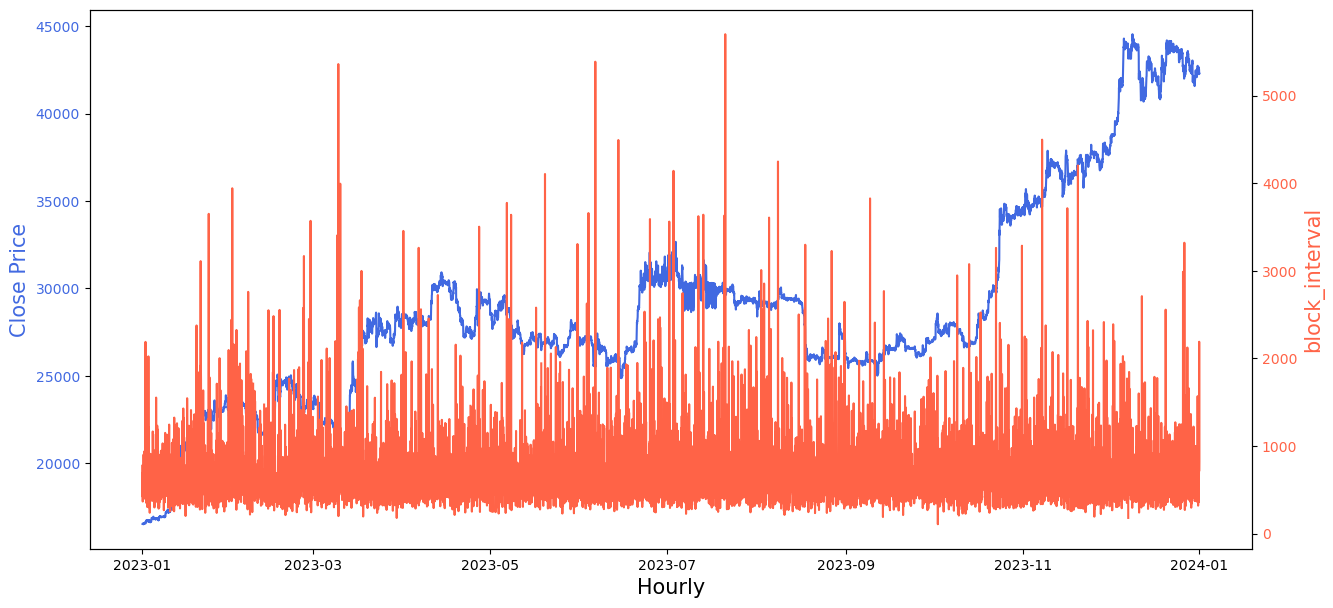

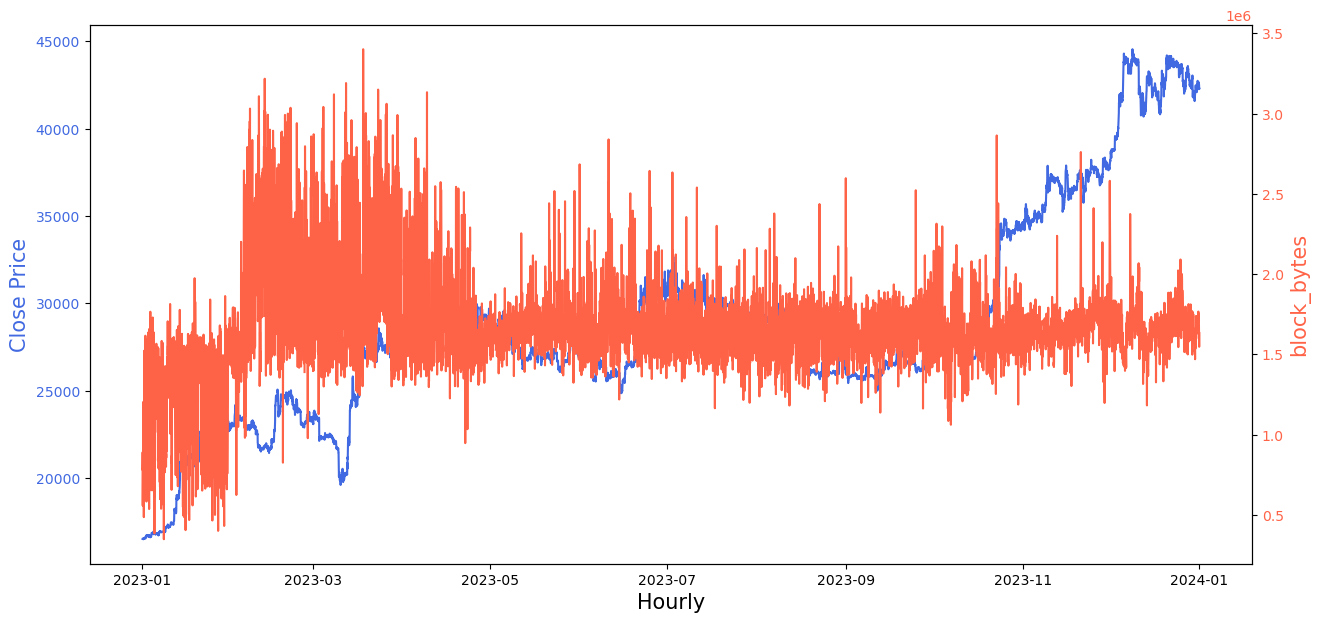

In [43]:
for col in net_features:
        fig, ax1 = plt.subplots(1, 1, figsize=(15, 7))
        # Close 가격 그래프 (왼쪽 y축)
        ax1.plot(network['datetime'], network['close'], color='royalblue', label='close')
        ax1.set_xlabel('Hourly', fontsize=15)
        ax1.set_ylabel('Close Price', color='royalblue', fontsize=15)
        ax1.tick_params(axis='y', labelcolor='royalblue')

        # col 그래프를 위한 두 번째 y축 생성
        ax2 = ax1.twinx()
        ax2.plot(network['datetime'], network[col], color='tomato', label='volume')
        ax2.set_ylabel(col, color='tomato', fontsize=15)
        ax2.tick_params(axis='y', labelcolor='tomato')
        # # 0 이상인지 0 미만인지 중요한 피처들에 대해 수평선을 그려줌
        # if col in ['funding_rates', 'coinbase_premium_gap']:
        #     # 0인 수평선 추가 (회색, 알파값 낮춤)
        #     ax2.axhline(y=0, color='gray', alpha=0.5, linestyle='--')
plt.show()

시간당 그래프의 추세를 보기엔 너무 변동폭이 커서 유의미하게 가격의 변동과 같이 비교해보며 보기가 힘들다

일단 알 수 있던 것은 UTXO, difficulty, supply total이 꾸준히 증가했다는 정도이다

일별로 그래프를 그려보아 더 살펴보거나

타겟별로 묶어서 보거나

파생변수를 생성해봐야할것같다

In [57]:
bar_network = network.groupby('target').agg({
    'fees_total': 'mean',
    'tokens_transferred_total': 'mean',
    'transactions_count_total': 'mean',
    'block_count': 'mean',
    'supply_total': 'mean',
    'supply_new': 'max',
    'hashrate': 'mean',
    'blockreward': 'mean',
    'addresses_count_active': 'mean',
    'addresses_count_sender': 'mean',
    'addresses_count_receiver': 'mean',
}).reset_index()

In [48]:
bar_network_features = [
    'fees_total',
    'tokens_transferred_total',
    'transactions_count_total',
    'block_count',
    'supply_total',
    'supply_new',
    'hashrate',
    'blockreward',
    'addresses_count_active',
    'addresses_count_sender',
    'addresses_count_receiver'
    ]

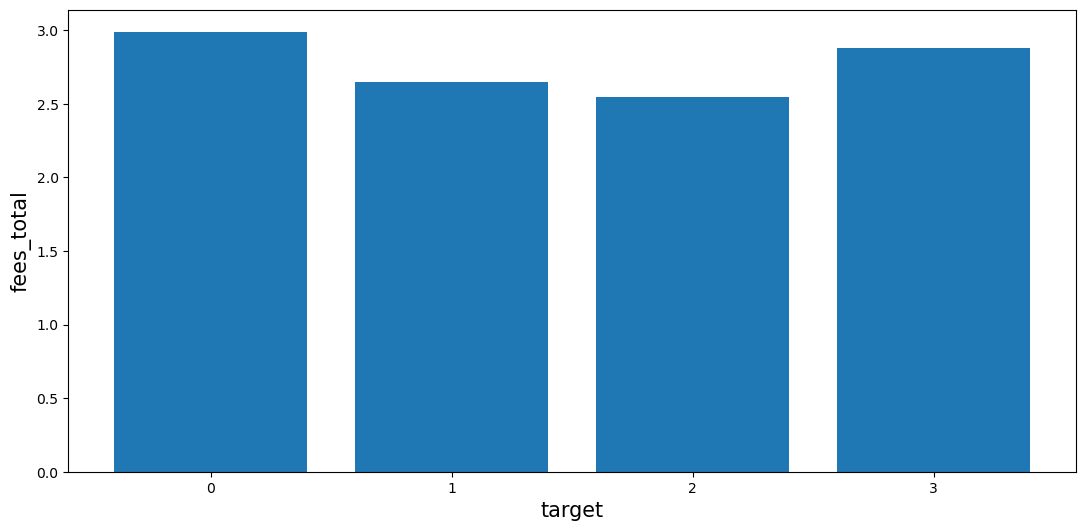

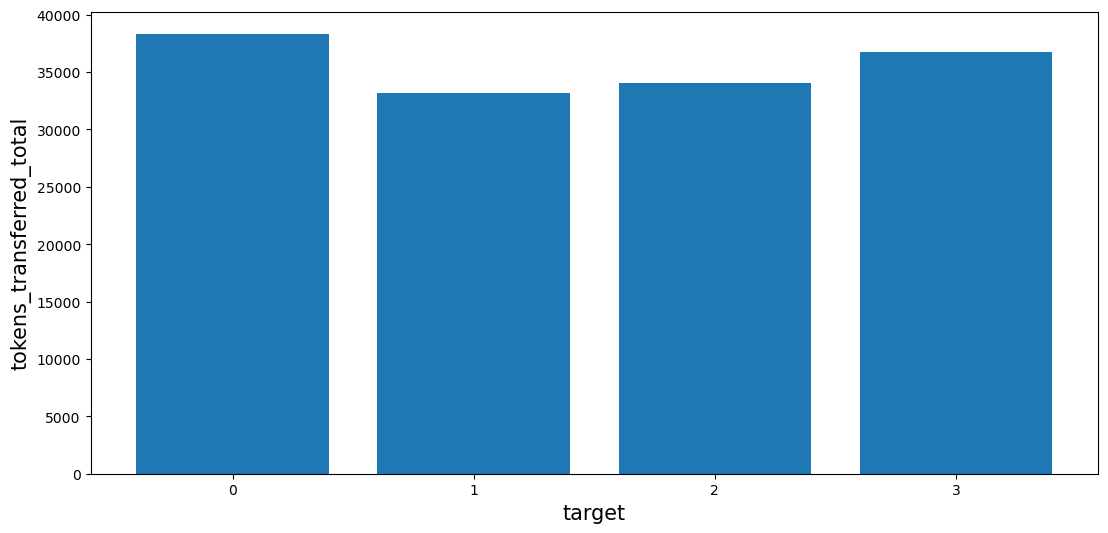

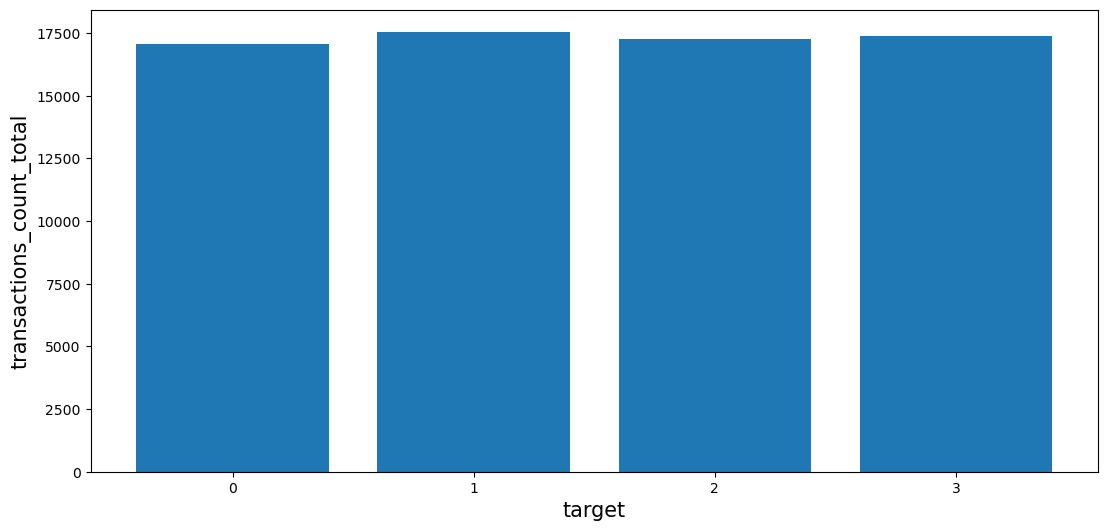

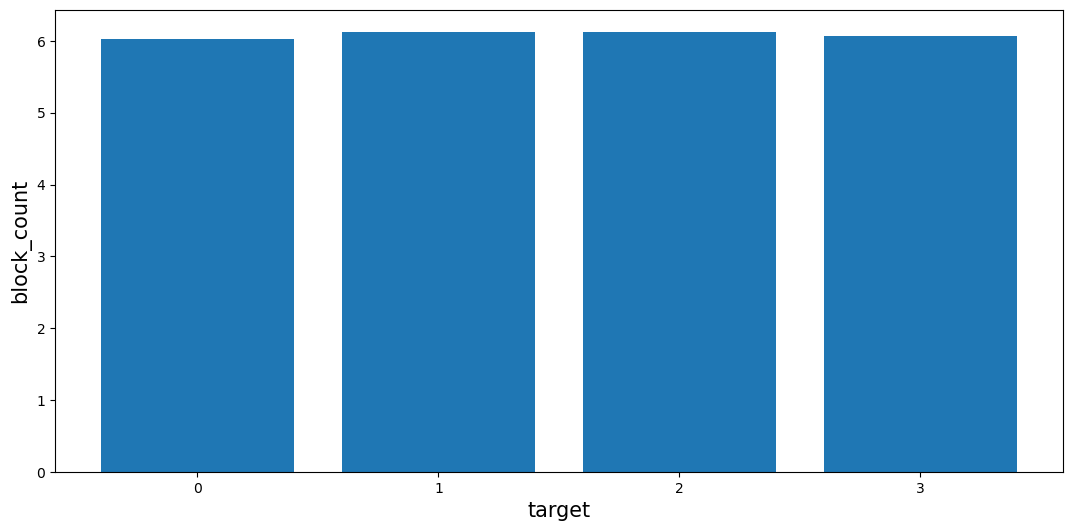

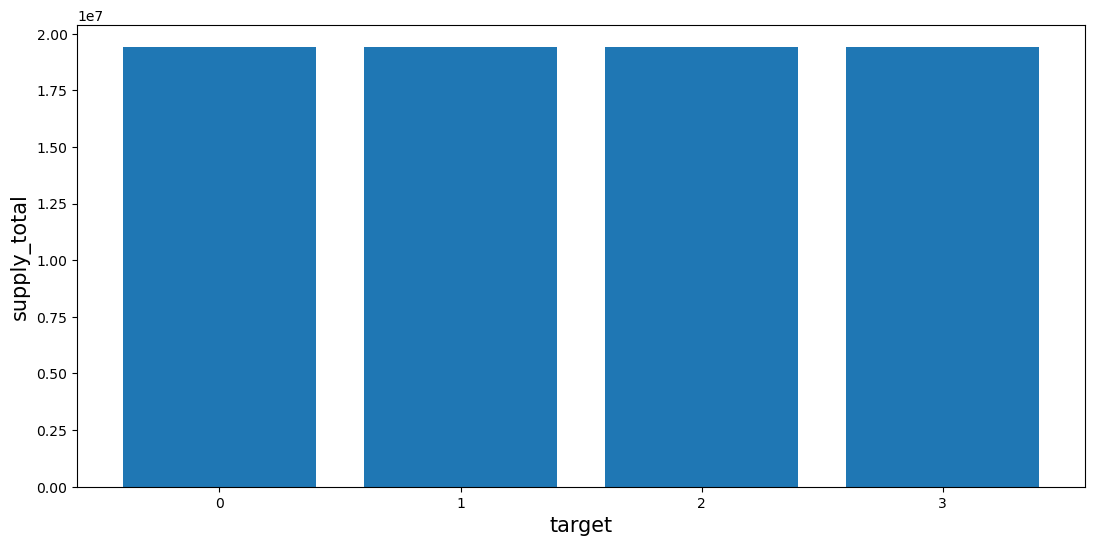

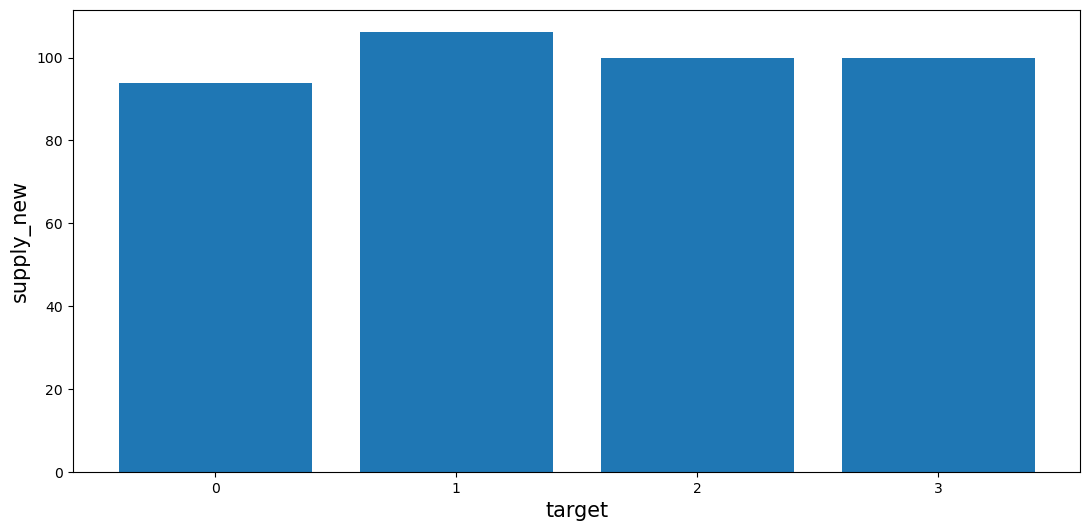

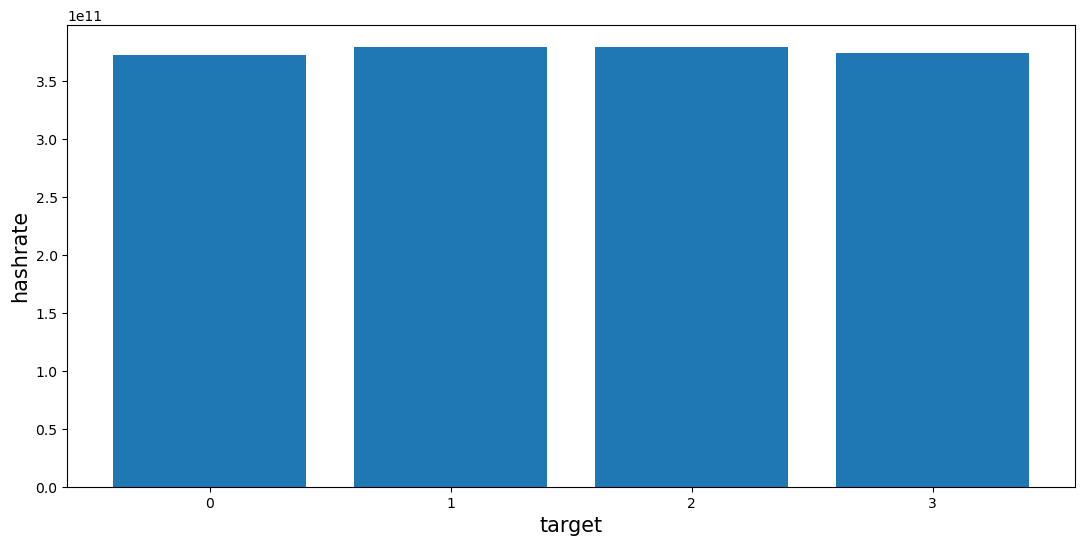

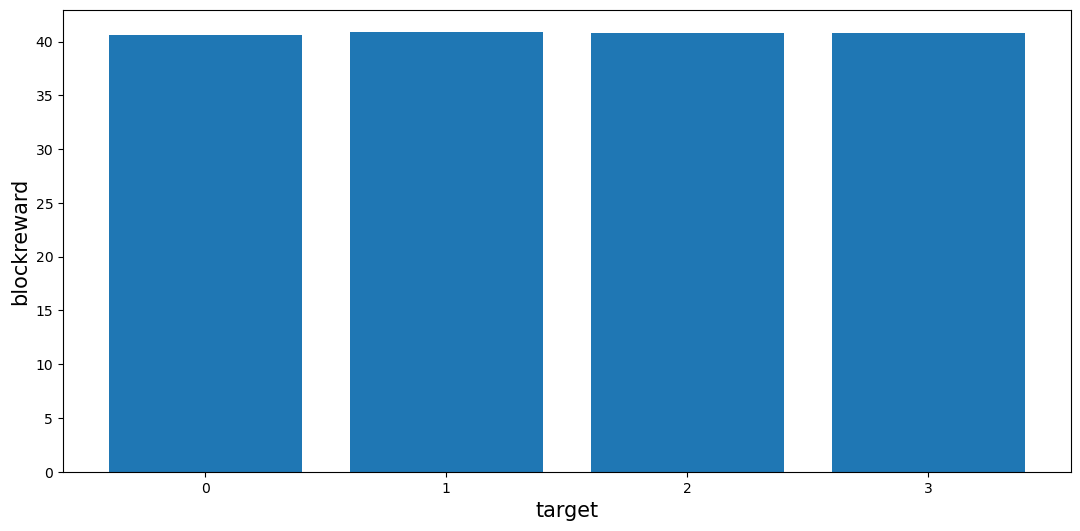

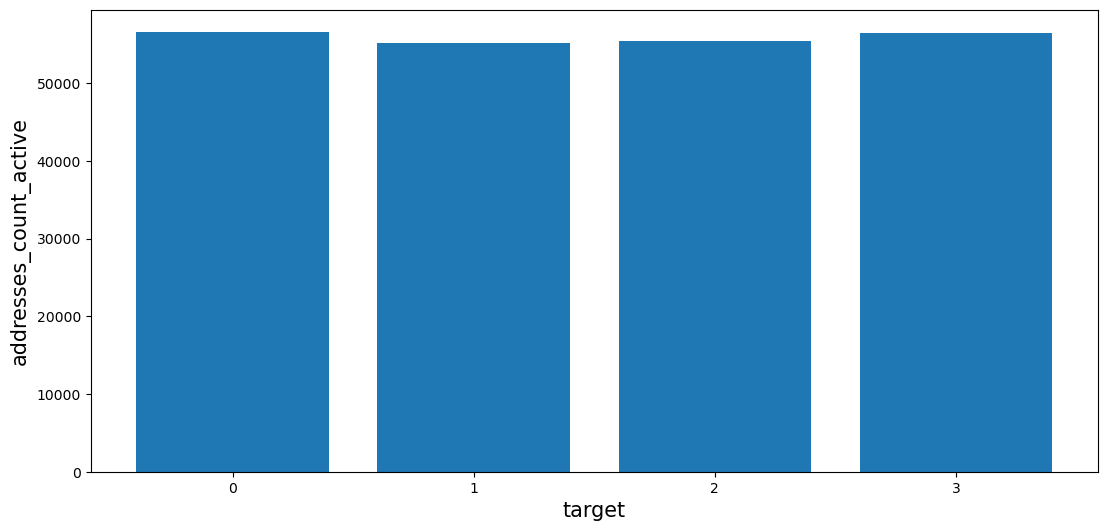

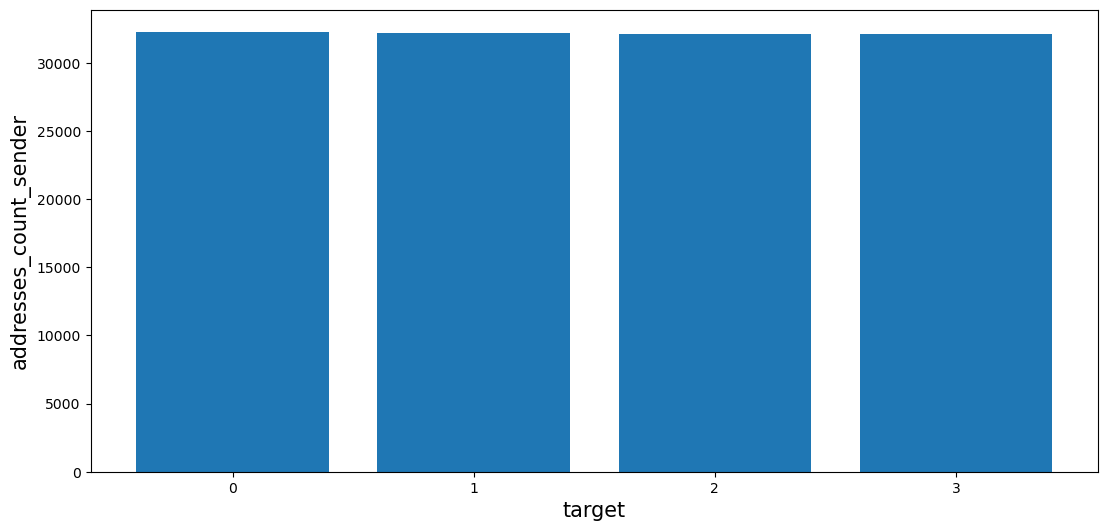

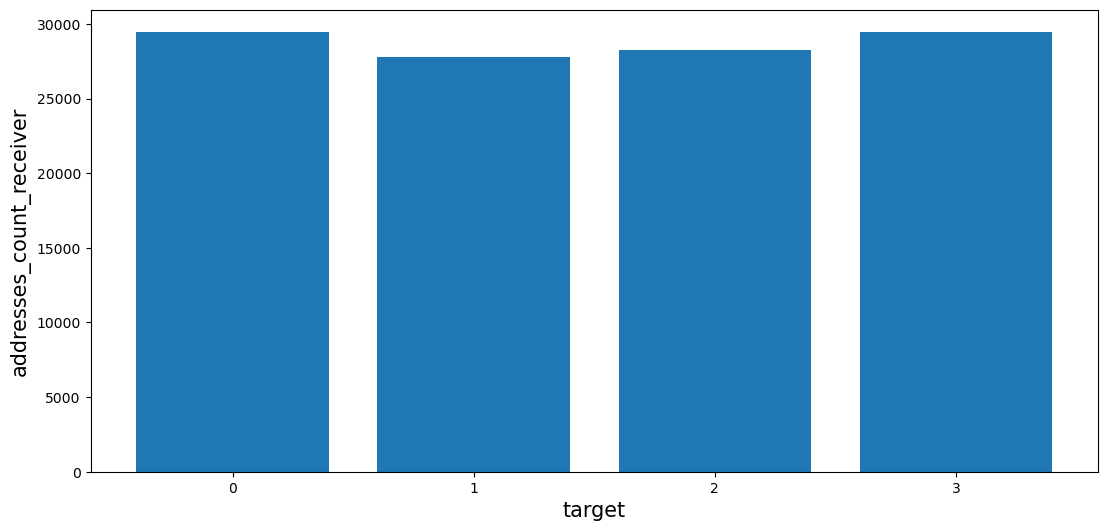

In [58]:
for col in bar_network_features:
    fig, ax = plt.subplots(figsize=(13, 6))
    ax.bar(bar_network['target'], bar_network[col])
    ax.set_xlabel('target', fontsize=15)
    ax.set_ylabel(col, fontsize=15)
    ax.set_xticks([0, 1, 2, 3])
plt.show()

뭔가 잘못했는지 뭔지 타겟과 네트워크 피처들 간에 연관성이 너무너무 적어보인다

### 해볼만한 것들
1. day of week, month 추가하여 보기
2. close 차분한 피처를 생성하여 target 보다 좀더 피처들과 선형적인 연관성을 찾아보기
3. open interest를 차분한 피처를 생성하여 살펴보기